In [1]:
import numpy as np
import sympy
import matplotlib.pyplot as plt
import base64
import pickle
from sympy import symbols, MatrixSymbol, lambdify, Matrix, pprint

from scipy.optimize import minimize
from matplotlib.ticker import FuncFormatter
from sympy import symbols, MatrixSymbol, lambdify
from matplotlib import cm
import random
import matplotlib.colors as mcolors
import scipy
import time
from pathlib import Path
import os
import ast
import pandas as pd
from pathlib import Path
from matplotlib.ticker import ScalarFormatter


import pennylane as qml
from functools import partial
from qiskit.circuit.library import *
from qiskit import *
from qiskit.quantum_info import *
import autograd
from pennylane.wires import Wires
import matplotlib.cm as cm
import base64
from qiskit import *
from qiskit.quantum_info import *

In [ ]:
# Load the first dataset
trot = 12
gate_idx = 0
for num_bath in [0,1,2]:
    if num_bath == 0:
        trott=trot
        # trott +=2
        a = f'/Users/so714f/Documents/offline/qrc/analog_results_trainable_global/trainsize_20_bath_coupling_order_0.1/{num_bath}_num_baths/{num_bath}/U2_{gate_idx}/reservoirs_1/trotter_step_{trott}/bath_False/data_run_0.pickle'
    else:
        a = f'/Users/so714f/Documents/offline/qrc/analog_results_trainable_global/noise_opt_cost/{num_bath}_num_baths/trainsize_20/bath_coupling_order_0.1/{num_bath}/U2_{gate_idx}/reservoirs_1/trotter_step_{trot}/data_run_0.pickle'

    with open(a, 'rb') as f:
        df_analog = pickle.load(f)
    a_lr = df_analog['opt_lr'][0]
    print(f"lf: {a_lr:.4f}")
    gate = df_analog['Gate'][0]
    decoded_gate = pickle.loads(base64.b64decode(gate.encode('utf-8')))
    # Extract data for the first dataset
    costs_analog = [float(i) for i in df_analog['costs'][0]]

    grads_per_epoch_analog = [np.array(i) for i in df_analog['grads_per_epoch'][0]]
    testing_results_analog = df_analog['testing_results'][0]
    fidelity_analog = 1 - df_analog['avg_fidelity'][0]
    opt_lr_analog = df_analog['opt_lr'][0]
    # print(f"stored epoch: {df_analog['stored_epoch'][0]}")
    # print(decoded_gate)
    # Load the first dataset
    a = f'/Users/so714f/Documents/offline/qrc/analog_results_trainable_global/trainsize_20_epoch1500_per_param_opt_backup/0/U3_11/reservoirs_1/trotter_step_40/bath_False/data_run_0.pickle'

    with open(a, 'rb') as f:
        df_analog = pickle.load(f)
    b_lr = df_analog['opt_lr'][0]
    print(f"lf: {b_lr:.4f}")
    gate = df_analog['Gate'][0]
    decoded_gate = pickle.loads(base64.b64decode(gate.encode('utf-8')))
    # print(decoded_gate)
    costs_analog2 = [float(i) for i in df_analog['costs'][0]]

    grads_per_epoch_analog2 = [np.array(i) for i in df_analog['grads_per_epoch'][0]]
    testing_results_analog2 = df_analog['testing_results'][0]
    fidelity_analog2 = 1 - df_analog['avg_fidelity'][0]
    opt_lr_analog2 = df_analog['opt_lr'][0]
    print(f"stored epoch: {df_analog['stored_epoch'][0]}")

    # Load the third dataset
    c = f'/Users/so714f/Documents/offline/qrc/analog_results_trainable_global/noise_opt_cost_adaptive_trainingset/{num_bath}_num_baths/trainsize_10/bath_coupling_order_0.1/{num_bath}/U2_{gate_idx}/reservoirs_1/trotter_step_{trot}/data_run_2.pickle'

    with open(c, 'rb') as f:
        df_c = pickle.load(f)
    c_lr = df_c['opt_lr'][0]
    costs_c = [float(i) for i in df_c['costs'][0]]
    testing_results_c = df_c['testing_results'][0]
    fig, ax = plt.subplots(2, 1, figsize=(12, 8))

        
    # Calculate average fidelity and standard deviation

    avg_fidelity_analog = np.mean(testing_results_analog)
    avg_fidelity_digital = np.mean(testing_results_analog2)
    avg_fidelity_c = np.mean(testing_results_c)


    label_analog = f"og: {avg_fidelity_analog:.5f}"
    label_digital = f"adapt: {avg_fidelity_digital:.5f}"
    label_c = f"adapt2: {avg_fidelity_c:.5f}"


    ax[0].hist([float(i) for i in testing_results_analog], bins=50, alpha=0.5,color='orange', label=label_analog)
    ax[0].hist([float(i) for i in testing_results_analog2], bins=50, alpha=0.5,color='blue', label=label_digital)
    ax[0].hist([float(i) for i in testing_results_c], bins=50,color='green', alpha=0.5, label=label_c)

    ax[0].legend(fontsize=20, loc="upper left")
    ax[0].set_title('Test Results')
    ax[0].set_xlabel('Fidelity')
    ax[0].set_ylabel('Frequency')

    # Plot costs per epoch
    ax[1].plot(range(1, len(costs_analog) + 1), costs_analog,color='orange', label=label_analog)
    ax[1].plot(range(1, len(costs_analog2) + 1), costs_analog2,color='blue', label=label_digital)
    ax[1].plot(range(1, len(costs_c) + 1), costs_c, color='green', label=label_c)

    ax[1].set_title('Costs per Epoch')
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('Cost')
    ax[1].legend(fontsize=20)
    plt.show()
# /Users/so714f/Documents/offline/qrc/analog_results_trainable_global/trainsize_20_epoch1500_bath_factor_0.1/0_num_baths/0/U2_0/reservoirs_1/trotter_step_12/bath_False/data_run_0.pickle

FileNotFoundError: [Errno 2] No such file or directory: '/Users/so714f/Documents/offline/qrc/analog_results_trainable_global/trainsize_20_bath_coupling_order_0.1/0_num_baths/0/U2_0/reservoirs_1/trotter_step_12/bath_False/data_run_0.pickle'

lf: [0.03059353 0.00476803 0.00495034 0.00341013 0.00551282 0.00404619
 0.04676811 0.00397939 0.00733417 0.00809613 0.02026153 0.05590897
 0.12016356 0.02873306 0.00694495 0.00450193 0.00191729 0.00281858
 0.01478723 0.1298851  0.02275843 0.00454159 0.01086957 0.0080572
 0.04002779 0.00741136 0.01256239 0.01420097 0.00914498 0.00374215
 0.2        0.01059892 0.00452066 0.02123942 0.01644074 0.02307423
 0.00957906 0.0079541  0.03566098 0.01405093 0.03148352 0.07631972
 0.01214532 0.00632662 0.04132572 0.09018005 0.01882795 0.05424159
 0.01342141 0.03040459 0.01712489 0.2        0.2        0.2
 0.00789246 0.02353335 0.01080138 0.0550183  0.08916393 0.05585586
 0.03106171 0.07299091 0.05722991 0.1490957  0.07574988 0.05342332
 0.06779438 0.05154731 0.02797875 0.10198068 0.04997998 0.01721258
 0.09948201 0.04155749 0.03647757 0.02980592 0.02602783 0.01410213
 0.03289068 0.02489905 0.11188991 0.02906917 0.0337479  0.03923878
 0.04187136 0.15974192 0.07639274 0.04961635 0.02447506 0.2
 0.055

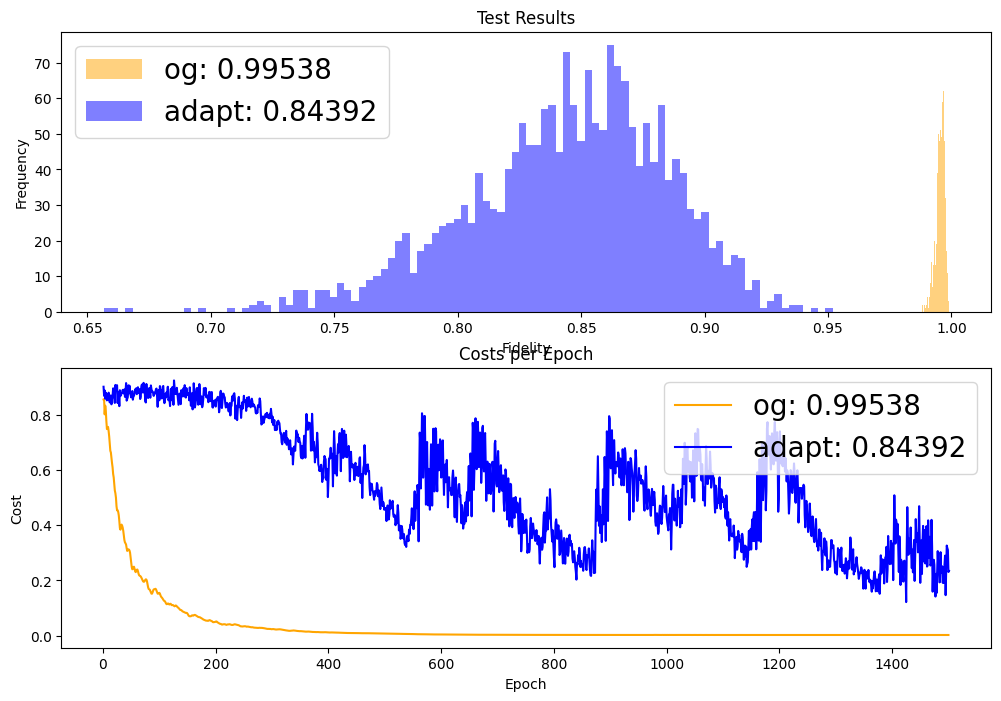

In [13]:
gate_idx = 0
N_ctrl = 3
n_train =20
num_res = 1
trots = 30
# Load the first dataset
a = f'/Users/so714f/Documents/offline/qrc/analog_results_trainable_global/trainsize_20_epoch1500_per_param_opt_backup/0/U3_11/reservoirs_1/trotter_step_{trots}/bath_False/data_run_0.pickle'
# a = f'/Users/so714f/Documents/offline/qrc/analog_results_trainable_global/trainsize_20/0/U{N_ctrl}_{gate_idx}/reservoirs_{num_res}/trotter_step_{trots}/bath_False/data_run_0.pickle'
with open(a, 'rb') as f:
    df_analog = pickle.load(f)
a_lr = df_analog.get('opt_lr',None)
print(f"lf: {a_lr[0]}")
print(f"num epochs: {df_analog['epochs'][0]}")
gate = df_analog['Gate'][0]
# training_state_metrics = df_analog['selected_indices'][0]
# print(training_state_metrics)
print(df_analog['stored_epoch'][0])
decoded_gate = pickle.loads(base64.b64decode(gate.encode('utf-8')))
# Extract data for the first dataset
costs_analog = [float(i) for i in df_analog['costs'][0]]
# training_states = df_analog['training_states'][0]
# print(f"training state #1: {training_states[0]}")
# print(f"params: {df_analog['init_params'][0]}")
grads_per_epoch_analog = [np.array(i) for i in df_analog['grads_per_epoch'][0]]
testing_results_analog = df_analog['testing_results'][0]
fidelity_analog = 1 - df_analog['avg_fidelity'][0]
opt_lr_analog = df_analog['opt_lr'][0]
# lrs = df_analog['lrs'][0]

# Load the first dataset
# a = f'/Users/so714f/Documents/offline/qrc/analog_results_trainable_global/trainsize_20/0/U{N_ctrl}_{gate_idx+1}/reservoirs_1/trotter_step_{trots}/bath_False/data_run_0.pickle'
a = f'/Users/so714f/Documents/offline/qrc/analog_results_trainable_global/trainsize_20_epoch1500_per_param_opt/0/U3_11/reservoirs_1/trotter_step_{trots}/bath_False/data_run_0.pickle'
# a = f'/Users/so714f/Documents/offline/qrc/analog_results_trainable_global/trainsize_20_epoch1500_case1/0/U{N_ctrl}_{gate_idx}/reservoirs_{num_res}/trotter_step_{trots}/bath_False/data_run_0.pickle'

with open(a, 'rb') as f:
    df_analog = pickle.load(f)
b_lr = df_analog.get('opt_lr',None)
print(f"\nlf: {b_lr[0]}")
gate = df_analog['Gate'][0]
decoded_gate = pickle.loads(base64.b64decode(gate.encode('utf-8')))
# print(decoded_gate)
costs_analog2 = [float(i) for i in df_analog['costs'][0]]
training_states = df_analog['training_states'][0]
# print(f"training state #1: {training_states[0]}")
# print(f"params: {df_analog['init_params'][0]}")
grads_per_epoch_analog2 = [np.array(i) for i in df_analog['grads_per_epoch'][0]]
testing_results_analog2 = df_analog['testing_results'][0]
fidelity_analog2 = 1 - df_analog['avg_fidelity'][0]
opt_lr_analog2 = df_analog['opt_lr'][0]
# lrs2 = df_analog['lrs'][0]
# print(f"stored epoch: {df_analog['stored_epoch'][0]}")
# Plot histograms of testing results
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

# Calculate average fidelity and standard deviation

avg_fidelity_analog = np.mean(testing_results_analog)
avg_fidelity_digital = np.mean(testing_results_analog2)

label_analog = f"og: {avg_fidelity_analog:.5f}"
label_digital = f"adapt: {avg_fidelity_digital:.5f}"



ax[0].hist([float(i) for i in testing_results_analog], bins=100, alpha=0.5,color='orange', label=label_analog,zorder=0)
ax[0].hist([float(i) for i in testing_results_analog2], bins=100, alpha=0.5,color='blue', label=label_digital,zorder=1)

ax[0].legend(fontsize=20, loc="upper left")
ax[0].set_title('Test Results')
ax[0].set_xlabel('Fidelity')
ax[0].set_ylabel('Frequency')

# Plot costs per epoch
ax[1].plot(range(1, len(costs_analog) + 1), costs_analog,color='orange', label=label_analog)
ax[1].plot(range(1, len(costs_analog2) + 1), costs_analog2,color='blue', label=label_digital)


ax[1].set_title('Costs per Epoch')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Cost')
ax[1].legend(fontsize=20)

# # Plot costs per epoch
# ax[2].plot(range(1, len(lrs) + 1), lrs,color='orange', label=label_analog)
# ax[2].plot(range(1, len(lrs2) + 1), lrs2,color='blue', label=label_digital)


# ax[2].set_title('LR per Epoch')
# ax[2].set_xlabel('Rate')
# ax[2].set_ylabel('Cost')
# ax[2].legend(fontsize=20)
plt.show()


In [2]:
fp ='/Users/so714f/Documents/offline/qrc/analog_results_trainable_global/trainsize_20_epoch1500_per_param_opt/0/U3_7/reservoirs_1/trotter_step_42/bath_False/data_run_0.pickle'


with open(fp, 'rb') as f:
    df = pickle.load(f)
print(df['fixed_params0']['test0'].keys())
print(df['fixed_params0']['test11']['qfim_eigvals'])

KeyError: 'fixed_params0'

In [57]:
r_i = 0.088073241670043
r_i = 0.12377161659819996
r_min = r_i*0.1
t = 10
# print(r_i*t)
print((r_min/r_i)**(1/t))


0.7943282347242815



Average Fidelity: 0.99998 ± 0.0

Average Fidelity: 0.99998 ± 0.0


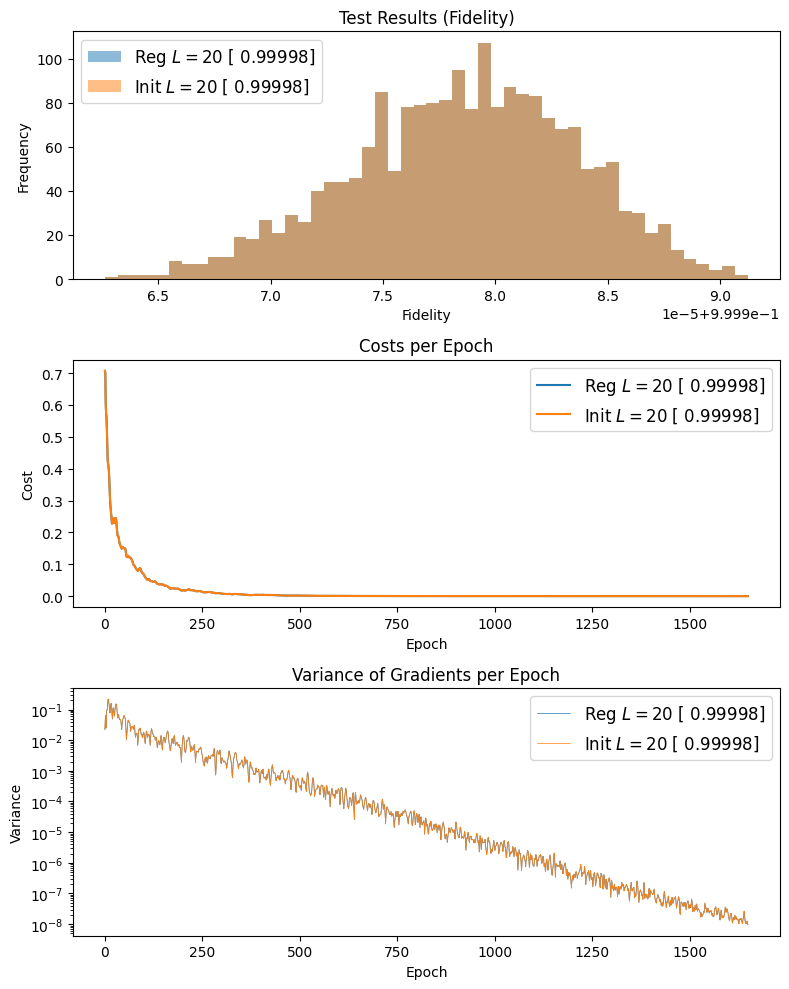

In [7]:
import jax.numpy as jnp
gate_idx = 17
trot = 16
trots = trot
n_train = 20
N_r = 2
N_ctrl = 2
# selected_sets =  # List of dataset indices
def calc_global_gradnorm(grads):
    return [np.linalg.norm(grad) for grad in grads]
def calculate_iqr(data):
    """
    Calculate the Interquartile Range (IQR) of the input data.
    """
    iqr = np.percentile(data, 85) - np.percentile(data, 15)
    return iqr
run_idx = 0
labels = [ 'Reg','Init']
# Initialize the paths to the datasets (as a loop)
data_files = [
    # f'/Users/so714f/Documents/offline/qrc/analog_results_trainable_global/trainsize_20_epoch1500_case1/0/U{N_ctrl}_{gate_idx}/reservoirs_1/trotter_step_{trots}/bath_False/data_run_0.pickle',
    # f'/Users/so714f/Documents/offline/qrc/analog_results_trainable_global/trainsize_20_epoch1500_case1/0/U{N_ctrl}_{gate_idx}/reservoirs_{N_r}/trotter_step_{trots}/bath_False/data_run_0.pickle',
    #  f'/Users/so714f/Documents/offline/qrc/analog_results_trainable_global/trainsize_20/0/U{N_ctrl}_{gate_idx}/reservoirs_{num_res}/trotter_step_{trots}/bath_False/data_run_0.pickle',
     
    #  f'/Users/so714f/Documents/offline/qrc/analog_results_trainable_global/trainsize_20_epoch1500_select_trainingset/0/U{N_ctrl}_{gate_idx}/reservoirs_{N_r}/trotter_step_{trots}/bath_False/data_run_0.pickle'



     f'/Users/so714f/Documents/offline/qrc/analog_results_trainable_global/trainsize_20_epoch1500_per_param_opt/0/U2_{gate_idx}/reservoirs_1/trotter_step_{trot}/bath_False/data_run_0.pickle',
     f'/Users/so714f/Documents/offline/qrc/analog_results_trainable_global/trainsize_20_epoch1500_per_param_opt/0/U2_{gate_idx}/reservoirs_1/trotter_step_{trot}/bath_False/data_run_1.pickle'
   
              ]
def calculate_gradient_stats(gradients):
    mean_grad = jnp.mean(gradients, axis=0)
    mean_grad_squared = jnp.mean(gradients**2, axis=0)
    var_grad = mean_grad_squared - mean_grad**2
    return mean_grad, var_grad
# Load the datasets and extract relevant data
data_results = []
for i,file_path in enumerate(data_files):
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    
    # Extract necessary information from the dataset
    costs = [float(i) for i in data['costs'][0]]
    grads_per_epoch = [np.array(i) for i in data['grads_per_epoch'][0]]
    init_grads = grads_per_epoch[0]
    

    # print(init_grads.shape, np.abs((init_grads)),init_grads)
    testing_results = data['testing_results'][0]
    fidelity = data['avg_fidelity'][0]
    # avg_fidelity = np.mean(fidelity)
    opt_lr = data['opt_lr'][0]
    
    trainin_states = data['training_states'][0]
    
    # grads_per_epoch = [np.array(i) for i in df_analog['grads_per_epoch'][0]]
    

    rocs = [float(i) for i in data['rocs'][0]]

    var_grad = [np.var(grads) for grads in grads_per_epoch]
    min_grad = [np.min(np.abs(grads)) for grads in grads_per_epoch]
    max_grad = [np.max(np.abs(grads)) for grads in grads_per_epoch]
    grad_norm = calc_global_gradnorm(grads_per_epoch)
    iqr_var_grad = calculate_iqr(jnp.array(init_grads))
    mean_fidelity = round(float(np.mean(testing_results)), 5)
    std_fidelity = round(float(np.std(testing_results)), 5)
    # Print the results
    print(f"\nAverage Fidelity: {mean_fidelity} ± {std_fidelity}")
    # print(f"lr: {opt_lr}")
    # print(file_path)
    # print(f"X[0]: {trainin_states[0]}")
    try:
        lrs = data['lrs'][0]
    except KeyError:
        opt_lr = data['opt_lr'][0]
        # print(costs)
        lrs = [opt_lr]*len(costs)
        # print(lrs)
    # print(f"Initial Variance: {np.var(init_grads):.5e}, IQR: {iqr_var_grad:.5e}, Min Gradient: {np.min(np.abs(init_grads)):.5e}, Max Grad: {np.max(np.abs(init_grads)):.5e}")

    mean_grad, var_grad_out = calculate_gradient_stats(init_grads)
    

    

    data_results.append({
        'costs': costs,
        'var_grad': var_grad,
        'min_grad': min_grad,
        'max_grad': max_grad,
        'avg_fidelity':fidelity,
        'testing_results': testing_results,
        'n_train': data['N_train'][0],
        'rocs':rocs,
        'grad_norm':grad_norm,
        'lrs':lrs,
    })

# Now plot the results
fig, ax = plt.subplots(3, 1, figsize=(8, 10))

# Loop over datasets and add each to the plots
for idx, dataset in enumerate(data_results):
    # Dynamically label the dataset for each selected set
    avg_fidelity = dataset['avg_fidelity']
    label = f'{labels[idx]} $L={dataset['n_train']}$ [ {avg_fidelity:.5f}]'
    
    # Plot testing results (histograms)
    ax[0].hist([float(i) for i in dataset['testing_results']], bins=50, alpha=0.5, label=f'{label}')
    
    # Plot costs per epoch
    ax[1].plot(range(1, len(dataset['costs']) + 1), dataset['costs'], label=label)
    
    # Plot variance of gradients per epoch
    ax[2].plot(range(1, len(dataset['var_grad']) + 1), dataset['var_grad'],linewidth=.5, label=label)
    ax[2].set_yscale('log')
    # Plot minimum absolute value of gradients per epoch
    
    # # Plot maximum absolute value of gradients per epoch
    # ax[3].plot(range(1, len(dataset['rocs']) + 1)[50:1000], dataset['rocs'][50:1000],linewidth=.5,  label=label)
    # # ax[3].set_yscale('log')
    # ax[4].plot(range(1, len(dataset['lrs']) + 1), dataset['lrs'],linewidth=.5, label= f'{labels[idx]} $L={dataset['n_train']}$ [ {dataset['lrs'][0]:.5f}]')
    # ax[3].set_yscale('log')

# Customize the plot titles, labels, and legends
ax[0].set_title('Test Results (Fidelity)')
ax[0].set_xlabel('Fidelity')
ax[0].set_ylabel('Frequency')
ax[0].legend(fontsize=12)

ax[1].set_title('Costs per Epoch')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Cost')
ax[1].legend(fontsize=12)

ax[2].set_title('Variance of Gradients per Epoch')
ax[2].set_xlabel('Epoch')
ax[2].set_ylabel('Variance')
ax[2].legend(fontsize=12)

# ax[3].set_title('ROC per Epoch')
# ax[3].set_xlabel('Epoch')
# # ax[3].set_ylabel('Max Abs Gradient')

# ax[3].legend(fontsize=12)

# ax[4].set_title('LR per Epoch')
# ax[4].set_xlabel('Epoch')
# ax[4].set_ylabel('Rate')
# ax[4].set_ylim(0.0,0.2)
# ax[4].legend(fontsize=12)

plt.tight_layout()
plt.show()

In [10]:
dataset['costs'][1249]

0.00025458281743340194

In [94]:
ACCUMULATION_SIZE = 3
PATIENCE = 20
n_eval = 1200/ACCUMULATION_SIZE
n_plateaus = n_eval / PATIENCE


print(f"est. plateau: {n_plateaus}")
opt_lr = 0.13083154094989718
min_scale = 0.01
mean_gradients = np.mean(np.abs(init_grads))
improvement_likelihood = mean_gradients / opt_lr
print(f"improvement_likelihood: {improvement_likelihood}")
rtol = 1e-2
atol = 1e-4
tol_thresh = rtol *mean_gradients + atol
print(mean_gradients)
patience_failure_rate = 1 - min(improvement_likelihood/tol_thresh,1)
print(f"patience_failure_rate: {patience_failure_rate}")

n_reductions = n_plateaus * patience_failure_rate
print(f"n_reductions: {n_reductions}")
ideal_factor = (min_scale/opt_lr)**(1/n_reductions)


est. plateau: 20.0
improvement_likelihood: 0.5068988800048828
0.06631836
patience_failure_rate: 0
n_reductions: 0.0


ZeroDivisionError: float division by zero

In [95]:

opt_lr = 0.13083154094989718
# opt_lr = 0.07817515917573756
lr_min = opt_lr*0.1
t = 8

factor = (lr_min/opt_lr)**(1/t)
factor

0.7498942093324559

In [80]:
opt_lr = 0.07817515917573756
lr_min = opt_lr*0.1
t = 10
print((lr_min/opt_lr))
factor = (lr_min/opt_lr)**(1/t)
factor

0.09999999999999999


0.7943282347242815

X[0]: (0.010181847959756851+0.2613193392753601j)

Average Fidelity (case 3): 0.0 ± 0.0
backup epoch: 989
X[0]: (0.5254375338554382+0.07947985082864761j)

Average Fidelity (case 3): 0.99734 ± 0.00113
backup epoch: 1517


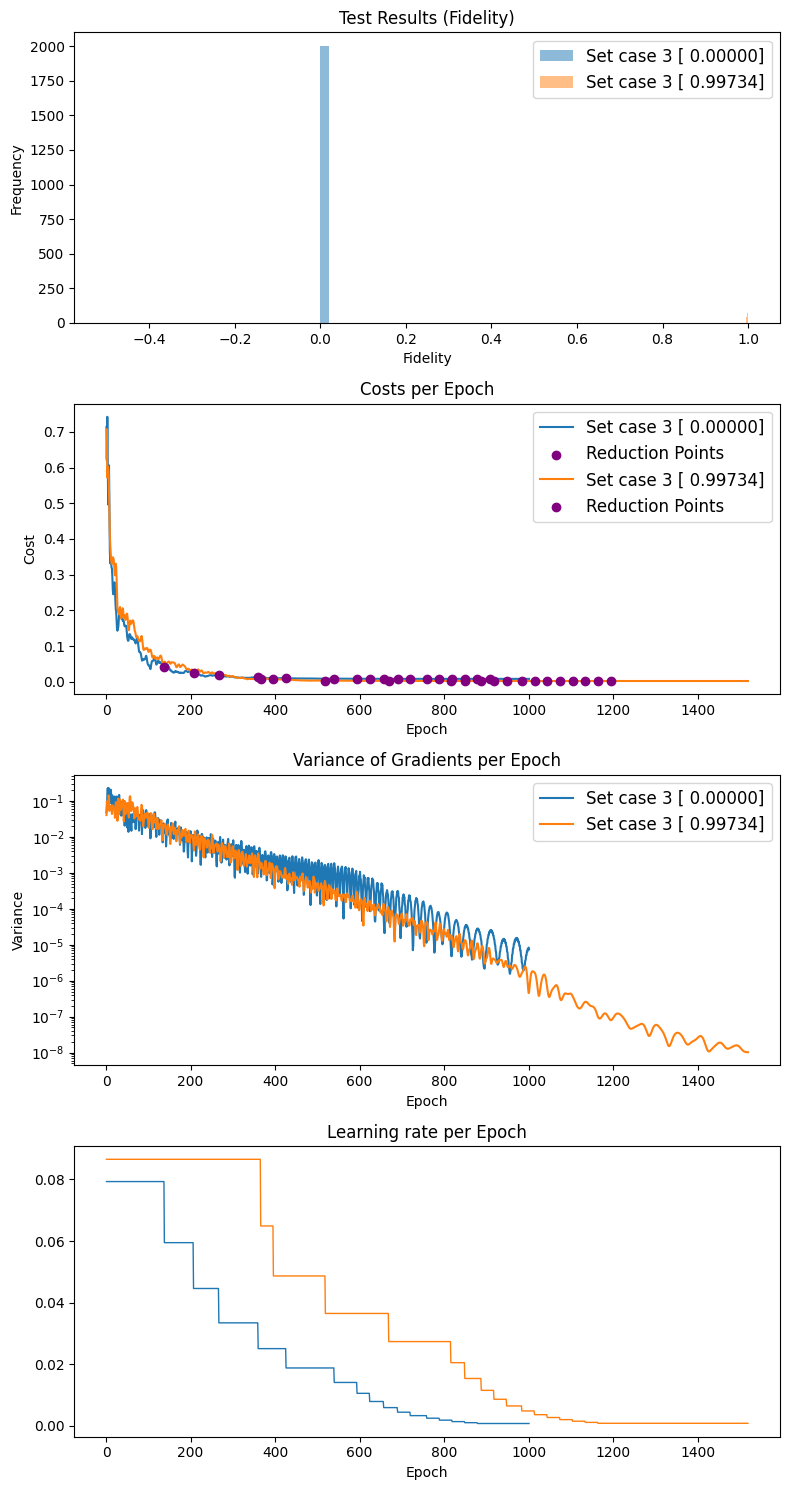

In [19]:
import jax.numpy as jnp
gate_idx = 3
selected_sets = {
                0:'',
                 1:'',
                # #  5:'',
                # #  6:'',
                #  2:'',
                #  3:'', 

                #  6:'',
                #  7:''
                # 13:'No clip',
                # 14:'optax.clip_by_global_norm(.2)'
                }

trot = 10
N_r = 1
N_ctrl = 2

n_train = 20
def calculate_iqr(data):
    """
    Calculate the Interquartile Range (IQR) of the input data.
    """
    iqr = np.percentile(data, 85) - np.percentile(data, 15)
    return iqr

# Initialize the paths to the datasets (as a loop)
data_files = [f'/Users/so714f/Documents/offline/qrc/analog_results_trainable_global/trainsize_20_epoch1000_case3/0/U{N_ctrl}_{gate_idx}/reservoirs_{N_r}/trotter_step_{trot}/bath_False/data_run_{run_idx}.pickle'
              for run_idx,_ in selected_sets.items()]
# data_files = [f'/Users/sophieblock/Downloads/debug/digital_results_trainable_global/trainsize_20_epoch1000//U{N_ctrl}_{gate_idx}/reservoirs_1/trotter_step_{trot}//bath_False/data_run_0.pickle']

def calculate_gradient_stats(gradients):
    mean_grad = jnp.mean(gradients, axis=0)
    mean_grad_squared = jnp.mean(gradients**2, axis=0)
    var_grad = mean_grad_squared - mean_grad**2
    return mean_grad, var_grad
def calculate_global_gradient_norm(grads_per_epoch):
    return [np.linalg.norm(grad) for grad in grads_per_epoch]
# Load the datasets and extract relevant data
data_results = []
for i,file_path in zip(selected_sets,data_files):
    # print(i_pair)
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    # print(data)
    # Extract necessary information from the dataset
    costs = [float(i) for i in data['costs'][0]]
    grads_per_epoch = [np.array(i) for i in data['grads_per_epoch'][0]]
    init_grads = grads_per_epoch[0]
    

    # print(init_grads.shape, np.abs((init_grads)),init_grads)
    testing_results = data['testing_results'][0]
    fidelity = data['avg_fidelity'][0]
    # avg_fidelity = np.mean(fidelity)
    opt_lr = data['opt_lr'][0]
    trainin_states = data['training_states'][0][0]
    print(f"X[0]: {trainin_states[0]}")
    

    
    var_grad = [np.var(grads) for grads in grads_per_epoch]
    min_grad = [np.min(np.abs(grads)) for grads in grads_per_epoch]
    max_grad = [np.max(np.abs(grads)) for grads in grads_per_epoch]

    iqr_var_grad = calculate_iqr(jnp.array(init_grads))
    mean_fidelity = round(float(np.mean(testing_results)), 5)
    std_fidelity = round(float(np.std(testing_results)), 5)
    selected_sets[i] = data['opt_description'][0]
    lrs = data['lrs'][0]
        # Load and process data
    scales_per_epoch =  data['scales_per_epoch'][0]
    scale_reduction_epochs =  data['scale_reduction_epochs'][0]

   
    # Print the results
    print(f"\nAverage Fidelity ({selected_sets[i]}): {mean_fidelity} ± {std_fidelity}")
    print(f"backup epoch: {data['backup_epoch'][0]}")
    # print(f"Initial Variance ({selected_sets[i]}): {np.var(init_grads):.5e}, IQR: {iqr_var_grad:.5e}, Min Gradient: {np.min(np.abs(init_grads)):.5e}, Max Grad: {np.max(np.abs(init_grads)):.5e}")
    # print(f"initial learning rate? (opt_lr): {opt_lr}\nX[0]: {trainin_states[0]}")

    mean_grad, var_grad_out = calculate_gradient_stats(init_grads)
    
    
    # print(f"\scale_reduction_epochs: {type(scales_per_epoch)}, \n{ data.get('scale_reduction_epochs', [])}")

    grad_norm = calculate_global_gradient_norm(grads_per_epoch)

    data_results.append({
        'costs': costs,
        'var_grad': var_grad,
        'min_grad': min_grad,
        'max_grad': max_grad,
        'grad_norm': grad_norm,
        'avg_fidelity': fidelity,
        'testing_results': testing_results,
        'lrs':lrs,
        'scales_per_epoch':scales_per_epoch,
        'scale_reduction_epochs':scale_reduction_epochs

    })

# Now plot the results
fig, ax = plt.subplots(4, 1, figsize=(8, 15))

# Loop over datasets and add each to the plots
for idx, dataset in zip(selected_sets,data_results):
    # Dynamically label the dataset for each selected set
    avg_fidelity = dataset['avg_fidelity']
    label = f'Set {selected_sets[idx]} [ {avg_fidelity:.5f}]'
    
    # Plot testing results (histograms)
    ax[0].hist([float(i) for i in dataset['testing_results']], bins=50, alpha=0.5, label=f'{label}')
    
    # Plot costs per epoch
    ax[1].plot(range(1, len(dataset['costs']) + 1), dataset['costs'], label=label)
    # print(dataset["scale_reduction_epochs"])
    ax[1].scatter(dataset["scale_reduction_epochs"], [dataset["costs"][e] for e in dataset["scale_reduction_epochs"]],
                    color="purple", label="Reduction Points", zorder=5)
    # Plot variance of gradients per epoch
    ax[2].plot(range(1, len(dataset['var_grad']) + 1), dataset['var_grad'], label=label)
    ax[2].set_yscale('log')
    # # Plot minimum absolute value of gradients per epoch
    # print(dataset['lrs'])
    ax[3].plot(range(1, len(dataset['lrs']) + 1), dataset['lrs'],linewidth=1, label=label)
   
    # # Plot maximum absolute value of gradients per epoch
    # ax[4].plot(range(1, len(dataset['max_grad']) + 1), dataset['max_grad'], label=label)
    # ax[4].set_yscale('log')

    # ax[5].plot(range(1, len(dataset['grad_norm']) + 1), dataset['grad_norm'], label=label)
    # # ax[5].set_yscale('log')

# Customize the plot titles, labels, and legends
ax[0].set_title('Test Results (Fidelity)')
ax[0].set_xlabel('Fidelity')
ax[0].set_ylabel('Frequency')
ax[0].legend(fontsize=12)

ax[1].set_title('Costs per Epoch')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Cost')
ax[1].legend(fontsize=12)

ax[2].set_title('Variance of Gradients per Epoch')
ax[2].set_xlabel('Epoch')
ax[2].set_ylabel('Variance')
ax[2].legend(fontsize=12)

ax[3].set_title('Learning rate per Epoch')
ax[3].set_xlabel('Epoch')


# ax[3].legend(fontsize=12)

# ax[4].set_title('Maximum Absolute Value of Gradients per Epoch')
# ax[4].set_xlabel('Epoch')
# ax[4].set_ylabel('Max Abs Gradient')
# ax[4].legend(fontsize=12)


# ax[5].set_title('Gradient Norm per Epoch')
# ax[5].set_xlabel('Epoch')

# ax[5].legend(fontsize=12)
plt.tight_layout()
plt.show()

Average Fidelity (10): 0.9999972582 ± 1.192e-06
0.081104286

Average Fidelity (16): 0.9999920726 ± 3.6091e-06
0.081104286

Average Fidelity (4): 0.9999958277 ± 2.0247e-06
0.081104286


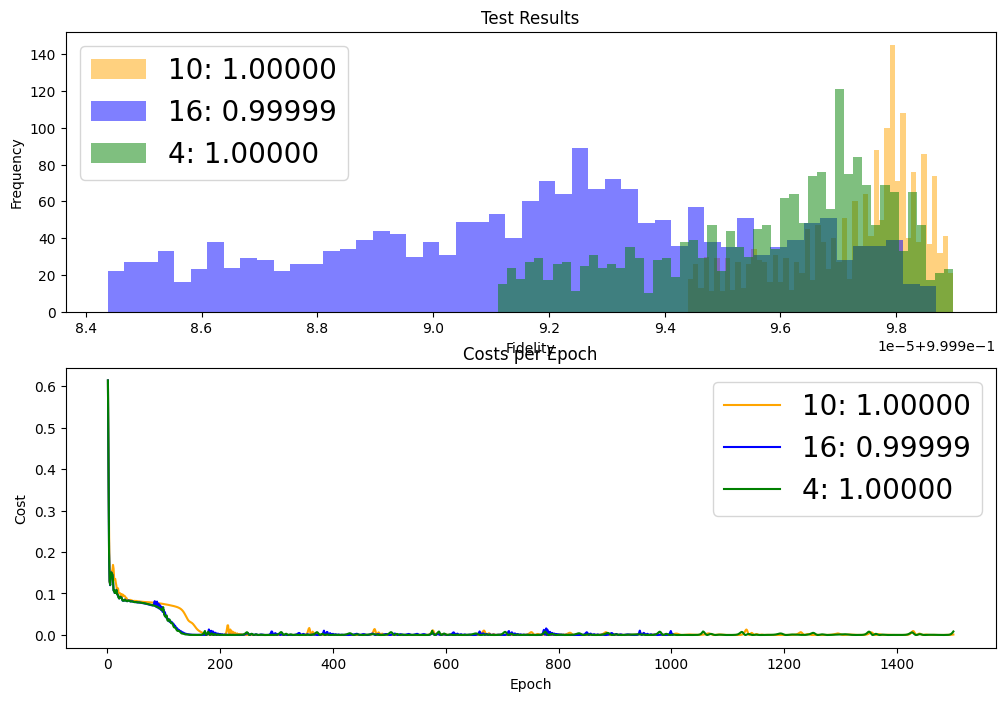

In [24]:
#/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10/0/U1_6/reservoirs_2/trotter_step_9/bath_False/data_run_0.pickle
# /Users/sophieblock/QRCCapstone/QFIM_traced_trainable_global/analog_model_new/Nc_2/GHZ_state/Nr_1/trotter_step_8/1.0K/data.pickle
import matplotlib.pyplot as plt
import numpy as np
import pickle
import base64
import jax.numpy as jnp

gate_idx = 1
trot = 1
N_r = 1
N_ctrl = 1

# Load the first dataset
a = f'/Users/so714f/Documents/offline/qrc/analog_results_trainable_global/trainsize_10_epoch1500/0/U1_1/reservoirs_1/trotter_step_4/bath_False/data_run_0.pickle'
with open(a, 'rb') as f:
    df_analog = pickle.load(f)
a_lr = df_analog['opt_lr'][0]
# Load the second dataset
b =f'/Users/so714f/Documents/offline/qrc/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U1_1/reservoirs_1/trotter_step_4/bath_False/data_run_0.pickle'
with open(b, 'rb') as f:
    df_digital = pickle.load(f)

b_lr = df_digital['opt_lr'][0]

# Load the third dataset
c = f'/Users/so714f/Documents/offline/qrc/analog_results_trainable_global/trainsize_10_epoch1500_gradientclip/0/U1_1/reservoirs_1/trotter_step_4/bath_False/data_run_0.pickle'
with open(c, 'rb') as f:
    df_c = pickle.load(f)
c_lr = df_c['opt_lr'][0]
# Load the fourth dataset

# Extract data for the first dataset
costs_analog = [float(i) for i in df_analog['costs'][0]]

grads_per_epoch_analog = [np.array(i) for i in df_analog['grads_per_epoch'][0]]
testing_results_analog = df_analog['testing_results'][0]
fidelity_analog = 1 - df_analog['avg_fidelity'][0]
opt_lr_analog = df_analog['opt_lr'][0]

# Extract data for the second dataset
costs_digital = [float(i) for i in df_digital['costs'][0]]
grads_per_epoch_digital = [np.array(i) for i in df_digital['grads_per_epoch'][0]]
testing_results_digital = df_digital['testing_results'][0]
fidelity_digital = 1 - df_digital['avg_fidelity'][0]
opt_lr_digital = df_digital['opt_lr'][0]

# Extract data for the third dataset
costs_c = [float(i) for i in df_c['costs'][0]]
grads_per_epoch_c = [np.array(i) for i in df_c['grads_per_epoch'][0]]
testing_results_c = df_c['testing_results'][0]
fidelity_c = 1 - df_c['avg_fidelity'][0]
opt_lr_c = df_c['opt_lr'][0]

# # Extract data for the fourth dataset
costs_d = [float(i) for i in df_d['costs'][0]]
grads_per_epoch_d = [np.array(i) for i in df_d['grads_per_epoch'][0]]
testing_results_d = df_d['testing_results'][0]
fidelity_d = 1 - df_d['avg_fidelity'][0]
opt_lr_d = df_d['opt_lr'][0]

# Convert jax arrays to Python floats without rounding
def calculate_iqr(data):
    """
    Calculate the Interquartile Range (IQR) of the input data.
    """
    iqr = np.percentile(data, 65) - np.percentile(data, 35)
    return iqr

# Convert jax arrays to Python floats without rounding
mean_fidelity_analog = round(float(np.mean(testing_results_analog)), 10)
std_fidelity_analog = round(float(np.std(testing_results_analog)), 10)


mean_fidelity_digital = round(float(np.mean(testing_results_digital)), 10)
std_fidelity_digital = round(float(np.std(testing_results_digital)), 10)


mean_fidelity_c = round(float(np.mean(testing_results_c)),10)
std_fidelity_c = round(float(np.std(testing_results_c)), 10)


# Print the results
print(f"Average Fidelity (10): {mean_fidelity_analog} ± {std_fidelity_analog}")
print(a_lr)
print(f"\nAverage Fidelity (16): {mean_fidelity_digital} ± {std_fidelity_digital}")
print(b_lr)
print(f"\nAverage Fidelity (4): {mean_fidelity_c} ± {std_fidelity_c}")
print(c_lr)

# Plot histograms of testing results
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

# Calculate average fidelity and standard deviation

avg_fidelity_analog = np.mean(testing_results_analog)
avg_fidelity_digital = np.mean(testing_results_digital)
avg_fidelity_c = np.mean(testing_results_c)


label_analog = f"10: {avg_fidelity_analog:.5f}"
label_digital = f"16: {avg_fidelity_digital:.5f}"
label_c = f"4: {avg_fidelity_c:.5f}"


ax[0].hist([float(i) for i in testing_results_analog], bins=50, alpha=0.5,color='orange', label=label_analog)
ax[0].hist([float(i) for i in testing_results_digital], bins=50, alpha=0.5,color='blue', label=label_digital)
ax[0].hist([float(i) for i in testing_results_c], bins=50,color='green', alpha=0.5, label=label_c)

ax[0].legend(fontsize=20, loc="upper left")
ax[0].set_title('Test Results')
ax[0].set_xlabel('Fidelity')
ax[0].set_ylabel('Frequency')

# Plot costs per epoch
ax[1].plot(range(1, len(costs_analog) + 1), costs_analog,color='orange', label=label_analog)
ax[1].plot(range(1, len(costs_digital) + 1), costs_digital,color='blue', label=label_digital)
ax[1].plot(range(1, len(costs_c) + 1), costs_c, color='green', label=label_c)

ax[1].set_title('Costs per Epoch')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Cost')
ax[1].legend(fontsize=20)


In [ ]:

df_analog['fixed_params0']['test0']['qfim_eigvals']

data_run_3__.pickle params: [1.4234914  2.4659102  1.2951058  1.3627691  0.8336768  0.50023913
 2.6894023 ]
ts: [-0.86711186+0.08357178j -0.35333222+0.34101188j]
data_run_3.pickle ts: [ 0.9878724   1.3084564   0.76465464 -2.8307986  -2.7318654  -0.6668649
 -2.2339776  -1.9976486  -0.07090987]
ts: [ 0.7002155+0.36594772j -0.5285465-0.31051418j]
Average Fidelity (10): 0.99893 ± 0.00077
0.13118675

Average Fidelity (16): 0.99984 ± 0.00013
0.18497069

Average Fidelity (4): 0.99985 ± 0.00012
0.18497069

Average Fidelity (8): 0.99895 ± 0.00073
0.13118675


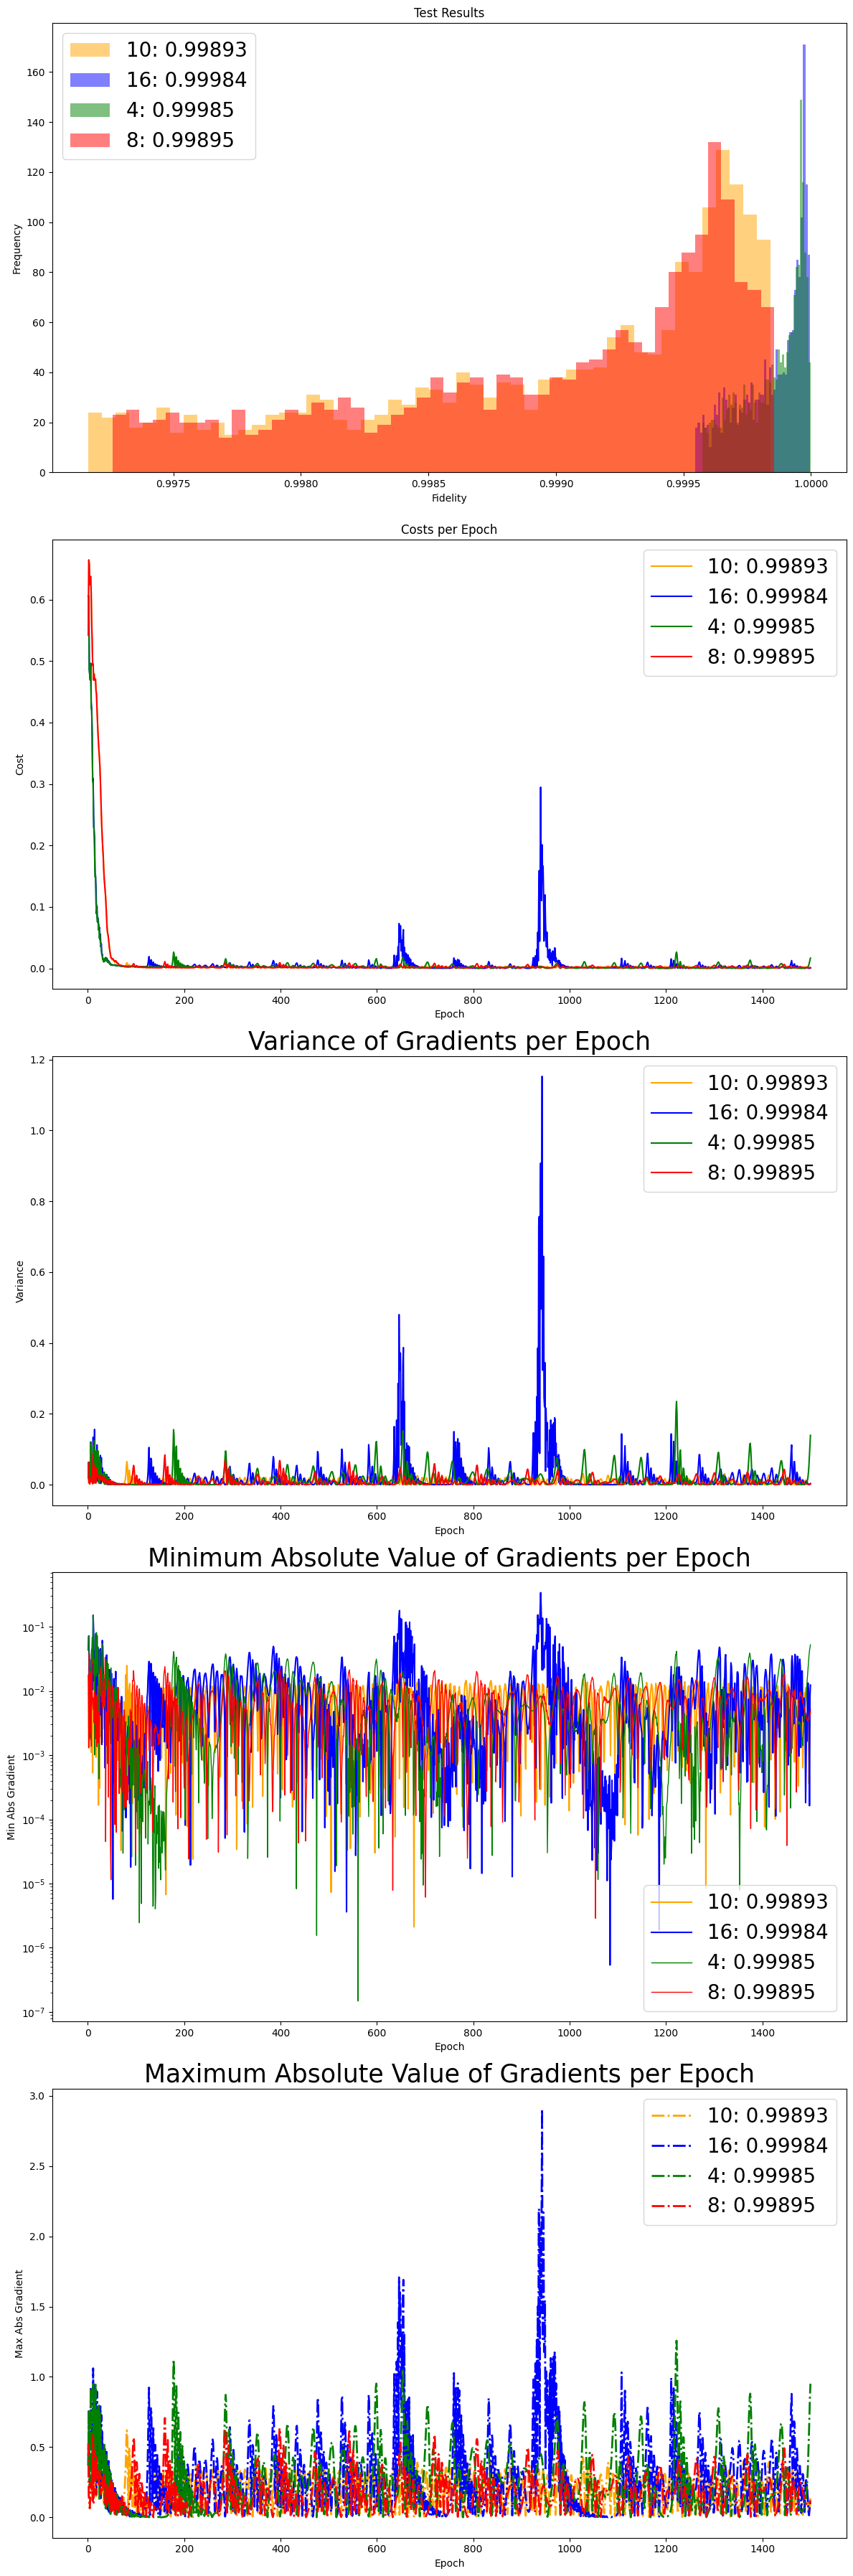

In [10]:
#/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10/0/U1_6/reservoirs_2/trotter_step_9/bath_False/data_run_0.pickle
# /Users/sophieblock/QRCCapstone/QFIM_traced_trainable_global/analog_model_new/Nc_2/GHZ_state/Nr_1/trotter_step_8/1.0K/data.pickle
import matplotlib.pyplot as plt
import numpy as np
import pickle
import base64
import jax.numpy as jnp

gate_idx = 1
trot = 1
N_r = 1
N_ctrl = 1

# Load the first dataset
a = f'/Users/so714f/Documents/offline/qrc/analog_results_trainable_global/trainsize_10_epoch1500/0/U1_0/reservoirs_1/trotter_step_3/bath_False/data_run_0.pickle'
with open(a, 'rb') as f:
    df_analog = pickle.load(f)
a_lr = df_analog['opt_lr'][0]
# Load the second dataset
b =f'/Users/so714f/Documents/offline/qrc/analog_results_trainable_global/trainsize_10_epoch1500/0/U1_0/reservoirs_1/trotter_step_2/bath_False/data_run_1.pickle'
with open(b, 'rb') as f:
    df_digital = pickle.load(f)

b_lr = df_digital['opt_lr'][0]

# Load the third dataset
c = f'/Users/so714f/Documents/offline/qrc/analog_results_trainable_global/trainsize_10_epoch1500/0/U1_0/reservoirs_1/trotter_step_2/bath_False/data_run_2.pickle'
with open(c, 'rb') as f:
    df_c = pickle.load(f)
c_lr = df_c['opt_lr'][0]
# Load the fourth dataset
d =f'/Users/so714f/Documents/offline/qrc/analog_results_trainable_global/trainsize_10_epoch1500/0/U1_0/reservoirs_1/trotter_step_3/bath_False/data_run_1.pickle'
with open(d, 'rb') as f:
    df_d = pickle.load(f)
d_lr = df_d['opt_lr'][0]
# Extract data for the first dataset
costs_analog = [float(i) for i in df_analog['costs'][0]]

grads_per_epoch_analog = [np.array(i) for i in df_analog['grads_per_epoch'][0]]
testing_results_analog = df_analog['testing_results'][0]
fidelity_analog = 1 - df_analog['avg_fidelity'][0]
opt_lr_analog = df_analog['opt_lr'][0]

# Extract data for the second dataset
costs_digital = [float(i) for i in df_digital['costs'][0]]
grads_per_epoch_digital = [np.array(i) for i in df_digital['grads_per_epoch'][0]]
testing_results_digital = df_digital['testing_results'][0]
fidelity_digital = 1 - df_digital['avg_fidelity'][0]
opt_lr_digital = df_digital['opt_lr'][0]

# Extract data for the third dataset
costs_c = [float(i) for i in df_c['costs'][0]]
grads_per_epoch_c = [np.array(i) for i in df_c['grads_per_epoch'][0]]
testing_results_c = df_c['testing_results'][0]
fidelity_c = 1 - df_c['avg_fidelity'][0]
opt_lr_c = df_c['opt_lr'][0]
print(f"data_run_3__.pickle params: {df_c['init_params'][0]}")
print(f"ts: {df_c['training_states'][0][0]}")
# # Extract data for the fourth dataset
costs_d = [float(i) for i in df_d['costs'][0]]
grads_per_epoch_d = [np.array(i) for i in df_d['grads_per_epoch'][0]]
testing_results_d = df_d['testing_results'][0]
fidelity_d = 1 - df_d['avg_fidelity'][0]
opt_lr_d = df_d['opt_lr'][0]
print(f"data_run_3.pickle ts: {df_d['init_params'][0]}")
print(f"ts: {df_d['training_states'][0][0]}")
# Convert jax arrays to Python floats without rounding
def calculate_iqr(data):
    """
    Calculate the Interquartile Range (IQR) of the input data.
    """
    iqr = np.percentile(data, 65) - np.percentile(data, 35)
    return iqr

# Convert jax arrays to Python floats without rounding
mean_fidelity_analog = round(float(np.mean(testing_results_analog)), 5)
std_fidelity_analog = round(float(np.std(testing_results_analog)), 5)


mean_fidelity_digital = round(float(np.mean(testing_results_digital)), 5)
std_fidelity_digital = round(float(np.std(testing_results_digital)), 5)


mean_fidelity_c = round(float(np.mean(testing_results_c)), 5)
std_fidelity_c = round(float(np.std(testing_results_c)), 5)


mean_fidelity_d = round(float(np.mean(testing_results_d)), 5)
std_fidelity_d = round(float(np.std(testing_results_d)), 5)


# Print the results
print(f"Average Fidelity (10): {mean_fidelity_analog} ± {std_fidelity_analog}")
print(a_lr)
print(f"\nAverage Fidelity (16): {mean_fidelity_digital} ± {std_fidelity_digital}")
print(b_lr)
print(f"\nAverage Fidelity (4): {mean_fidelity_c} ± {std_fidelity_c}")
print(c_lr)
print(f"\nAverage Fidelity (8): {mean_fidelity_d} ± {std_fidelity_d}")
print(d_lr)
# Plot histograms of testing results
fig, ax = plt.subplots(5, 1, figsize=(12, 36))

# Calculate average fidelity and standard deviation

avg_fidelity_analog = np.mean(testing_results_analog)
avg_fidelity_digital = np.mean(testing_results_digital)
avg_fidelity_c = np.mean(testing_results_c)
avg_fidelity_d = np.mean(testing_results_d)

label_analog = f"10: {avg_fidelity_analog:.5f}"
label_digital = f"16: {avg_fidelity_digital:.5f}"
label_c = f"4: {avg_fidelity_c:.5f}"
label_d = f"8: {avg_fidelity_d:.5f}"

ax[0].hist([float(i) for i in testing_results_analog], bins=50, alpha=0.5,color='orange', label=label_analog)
ax[0].hist([float(i) for i in testing_results_digital], bins=50, alpha=0.5,color='blue', label=label_digital)
ax[0].hist([float(i) for i in testing_results_c], bins=50,color='green', alpha=0.5, label=label_c)
ax[0].hist([float(i) for i in testing_results_d], bins=50,color='red', alpha=0.5, label=label_d)
ax[0].legend(fontsize=20, loc="upper left")
ax[0].set_title('Test Results')
ax[0].set_xlabel('Fidelity')
ax[0].set_ylabel('Frequency')

# Plot costs per epoch
ax[1].plot(range(1, len(costs_analog) + 1), costs_analog,color='orange', label=label_analog)
ax[1].plot(range(1, len(costs_digital) + 1), costs_digital,color='blue', label=label_digital)
ax[1].plot(range(1, len(costs_c) + 1), costs_c, color='green', label=label_c)
ax[1].plot(range(1, len(costs_d) + 1), costs_d, color='red', label=label_d)
ax[1].set_title('Costs per Epoch')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Cost')
ax[1].legend(fontsize=20)

# Plot variance of gradients per epoch
var_analog = [np.var(grads) for grads in grads_per_epoch_analog]
min_abs_analog = [np.min(np.abs(grads)) for grads in grads_per_epoch_analog]
max_abs_analog = [np.max(np.abs(grads)) for grads in grads_per_epoch_analog]

var_digital = [np.var(grads) for grads in grads_per_epoch_digital]
min_abs_digital = [np.min(np.abs(grads)) for grads in grads_per_epoch_digital]
max_abs_digital = [np.max(np.abs(grads)) for grads in grads_per_epoch_digital]

var_c = [np.var(grads) for grads in grads_per_epoch_c]
min_abs_c = [np.min(np.abs(grads)) for grads in grads_per_epoch_c]
max_abs_c = [np.max(np.abs(grads)) for grads in grads_per_epoch_c]

var_d = [np.var(grads) for grads in grads_per_epoch_d]
min_abs_d = [np.min(np.abs(grads)) for grads in grads_per_epoch_d]
max_abs_d = [np.max(np.abs(grads)) for grads in grads_per_epoch_d]

ax[2].plot(range(1, len(var_analog) + 1), var_analog, label=label_analog, linestyle='-', color='orange')
ax[2].plot(range(1, len(var_digital) + 1), var_digital, label=label_digital, linestyle='-', color='blue')
ax[2].plot(range(1, len(var_c) + 1), var_c, label=label_c, linestyle='-', color='green')
ax[2].plot(range(1, len(var_d) + 1), var_d, label=label_d, linestyle='-', color='red')
ax[2].set_title('Variance of Gradients per Epoch', fontsize=25)
ax[2].set_xlabel('Epoch')
ax[2].set_ylabel('Variance')
ax[2].legend(fontsize=20)

# Plot minimum absolute value of gradients per epoch
ax[3].plot(range(1, len(min_abs_analog) + 1), min_abs_analog, linewidth=1.5, color='orange', label=label_analog, linestyle='-')
ax[3].plot(range(1, len(min_abs_digital) + 1), min_abs_digital, linewidth=1.5, color='blue', label=label_digital, linestyle='-')
ax[3].plot(range(1, len(min_abs_c) + 1), min_abs_c, linewidth=1, color='green', label=label_c, linestyle='-')
ax[3].plot(range(1, len(min_abs_d) + 1), min_abs_d, linewidth=1, color='red', label=label_d, linestyle='-')
ax[3].set_title('Minimum Absolute Value of Gradients per Epoch', fontsize=25)
ax[3].set_xlabel('Epoch')
ax[3].set_yscale('log')
ax[3].set_ylabel('Min Abs Gradient')
ax[3].legend(fontsize=20)

# Plot maximum absolute value of gradients per epoch
ax[4].plot(range(1, len(max_abs_analog) + 1), max_abs_analog, linewidth=2, color='orange', label=label_analog, linestyle='-.')
ax[4].plot(range(1, len(max_abs_digital) + 1), max_abs_digital, linewidth=2, color='blue', label=label_digital, linestyle='-.')
ax[4].plot(range(1, len(max_abs_c) + 1), max_abs_c, linewidth=2, color='green', label=label_c, linestyle='-.')
ax[4].plot(range(1, len(max_abs_d) + 1), max_abs_d, linewidth=2, color='red', label=label_d, linestyle='-.')
ax[4].set_title('Maximum Absolute Value of Gradients per Epoch', fontsize=25)
ax[4].set_xlabel('Epoch')
ax[4].set_ylabel('Max Abs Gradient')
ax[4].legend(fontsize=20)

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import base64
import jax.numpy as jnp

gate_idx = 4
trot = 1
N_r = 1
N_ctrl = 1

# Load the first dataset
a = f'/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_test/0/U{N_ctrl}_{gate_idx}/reservoirs_{N_r}/trotter_step_{trot}/bath_False/data_run_9.pickle'
with open(a, 'rb') as f:
    df_analog = pickle.load(f)

# Load the second dataset
b = f'/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_test/0/U{N_ctrl}_{gate_idx}/reservoirs_{N_r}/trotter_step_{trot}/bath_False/data_run_19.pickle'
with open(b, 'rb') as f:
    df_digital = pickle.load(f)

# Load the third dataset
c = f'/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_test/0/U{N_ctrl}_{gate_idx}/reservoirs_{N_r}/trotter_step_{trot}/bath_False/data_run_3.pickle'
with open(c, 'rb') as f:
    df_c = pickle.load(f)

# Load the fourth dataset
d = f'/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_test/0/U{N_ctrl}_{gate_idx}/reservoirs_{N_r}/trotter_step_{trot}/bath_False/data_run_7.pickle'
with open(d, 'rb') as f:
    df_d = pickle.load(f)

# Extract data for the first dataset
costs_analog = [float(i) for i in df_analog['costs'][0]]

grads_per_epoch_analog = [np.array(i) for i in df_analog['grads_per_epoch'][0]]
testing_results_analog = df_analog['testing_results'][0]
fidelity_analog = 1 - df_analog['avg_fidelity'][0]
opt_lr_analog = df_analog['opt_lr'][0]

# Extract data for the second dataset
costs_digital = [float(i) for i in df_digital['costs'][0]]
grads_per_epoch_digital = [np.array(i) for i in df_digital['grads_per_epoch'][0]]
testing_results_digital = df_digital['testing_results'][0]
fidelity_digital = 1 - df_digital['avg_fidelity'][0]
opt_lr_digital = df_digital['opt_lr'][0]

# Extract data for the third dataset
costs_c = [float(i) for i in df_c['costs'][0]]
grads_per_epoch_c = [np.array(i) for i in df_c['grads_per_epoch'][0]]
testing_results_c = df_c['testing_results'][0]
fidelity_c = 1 - df_c['avg_fidelity'][0]
opt_lr_c = df_c['opt_lr'][0]
print(f"data_run_3__.pickle params: {df_c['init_params'][0]}")
print(f"ts: {df_c['training_states'][0][0]}")
# # Extract data for the fourth dataset
costs_d = [float(i) for i in df_d['costs'][0]]
grads_per_epoch_d = [np.array(i) for i in df_d['grads_per_epoch'][0]]
testing_results_d = df_d['testing_results'][0]
fidelity_d = 1 - df_d['avg_fidelity'][0]
opt_lr_d = df_d['opt_lr'][0]
print(f"data_run_3.pickle ts: {df_d['init_params'][0]}")
print(f"ts: {df_d['training_states'][0][0]}")
# Convert jax arrays to Python floats without rounding
def calculate_iqr(data):
    """
    Calculate the Interquartile Range (IQR) of the input data.
    """
    iqr = np.percentile(data, 65) - np.percentile(data, 35)
    return iqr

# Convert jax arrays to Python floats without rounding
mean_fidelity_analog = round(float(np.mean(testing_results_analog)), 5)
std_fidelity_analog = round(float(np.std(testing_results_analog)), 5)
var_grad_analog = float(jnp.mean(df_analog['var_grad'][0]))
iqr_var_grad_analog = calculate_iqr(jnp.array(df_analog['var_grad'][0]))
min_grad_analog = float(jnp.min(df_analog['min_grad'][0]))
max_grad_analog = float(jnp.max(df_analog['max_grad'][0]))

mean_fidelity_digital = round(float(np.mean(testing_results_digital)), 5)
std_fidelity_digital = round(float(np.std(testing_results_digital)), 5)
var_grad_digital = float(jnp.mean(df_digital['var_grad'][0]))
iqr_var_grad_digital = calculate_iqr(jnp.array(df_digital['var_grad'][0]))
min_grad_digital = float(jnp.min(df_digital['min_grad'][0]))
max_grad_digital = float(jnp.max(df_digital['max_grad'][0]))

mean_fidelity_c = round(float(np.mean(testing_results_c)), 5)
std_fidelity_c = round(float(np.std(testing_results_c)), 5)
var_grad_c = float(jnp.mean(df_c['var_grad'][0]))
iqr_var_grad_c = calculate_iqr(jnp.array(df_c['var_grad'][0]))
min_grad_c = float(jnp.min(df_c['min_grad'][0]))
max_grad_c = float(jnp.max(df_c['max_grad'][0]))

mean_fidelity_d = round(float(np.mean(testing_results_d)), 5)
std_fidelity_d = round(float(np.std(testing_results_d)), 5)
var_grad_d = float(jnp.mean(df_d['var_grad'][0]))
iqr_var_grad_d = calculate_iqr(jnp.array(df_d['var_grad'][0]))
min_grad_d = float(jnp.min(df_d['min_grad'][0]))
max_grad_d = float(jnp.max(df_d['max_grad'][0]))

# Print the results
print(f"Average Fidelity (10): {mean_fidelity_analog} ± {std_fidelity_analog}")
print(f"Initial Variance (10): {var_grad_analog:.5e}, IQR: {iqr_var_grad_analog:.5e}, Min Gradient: {min_grad_analog:.5e}, Max Gradient: {max_grad_analog:.5e}")

print(f"\nAverage Fidelity (16): {mean_fidelity_digital} ± {std_fidelity_digital}")
print(f"Initial Variance (16): {var_grad_digital:.5e}, IQR: {iqr_var_grad_digital:.5e}, Min Gradient: {min_grad_digital:.5e}, Max Gradient: {max_grad_digital:.5e}")

print(f"\nAverage Fidelity (4): {mean_fidelity_c} ± {std_fidelity_c}")
print(f"Initial Variance (4): {var_grad_c:.5e}, IQR: {iqr_var_grad_c:.5e}, Min Gradient: {min_grad_c:.5e}, Max Gradient: {max_grad_c:.5e}")

print(f"\nAverage Fidelity (8): {mean_fidelity_d} ± {std_fidelity_d}")
print(f"Initial Variance (8): {var_grad_d:.5e}, IQR: {iqr_var_grad_d:.5e}, Min Gradient: {min_grad_d:.5e}, Max Gradient: {max_grad_d:.5e}")

# Plot histograms of testing results
fig, ax = plt.subplots(5, 1, figsize=(12, 36))

# Calculate average fidelity and standard deviation

avg_fidelity_analog = np.mean(testing_results_analog)
avg_fidelity_digital = np.mean(testing_results_digital)
avg_fidelity_c = np.mean(testing_results_c)
avg_fidelity_d = np.mean(testing_results_d)

label_analog = f"10: {avg_fidelity_analog:.5f}"
label_digital = f"16: {avg_fidelity_digital:.5f}"
label_c = f"4: {avg_fidelity_c:.5f}"
label_d = f"8: {avg_fidelity_d:.5f}"

ax[0].hist([float(i) for i in testing_results_analog], bins=50, alpha=0.5,color='orange', label=label_analog)
ax[0].hist([float(i) for i in testing_results_digital], bins=50, alpha=0.5,color='blue', label=label_digital)
ax[0].hist([float(i) for i in testing_results_c], bins=50,color='green', alpha=0.5, label=label_c)
ax[0].hist([float(i) for i in testing_results_d], bins=50,color='red', alpha=0.5, label=label_d)
ax[0].legend(fontsize=20, loc="upper left")
ax[0].set_title('Test Results')
ax[0].set_xlabel('Fidelity')
ax[0].set_ylabel('Frequency')

# Plot costs per epoch
ax[1].plot(range(1, len(costs_analog) + 1), costs_analog,color='orange', label=label_analog)
ax[1].plot(range(1, len(costs_digital) + 1), costs_digital,color='blue', label=label_digital)
ax[1].plot(range(1, len(costs_c) + 1), costs_c, color='green', label=label_c)
ax[1].plot(range(1, len(costs_d) + 1), costs_d, color='red', label=label_d)
ax[1].set_title('Costs per Epoch')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Cost')
ax[1].legend(fontsize=20)

# Plot variance of gradients per epoch
var_analog = [np.var(grads) for grads in grads_per_epoch_analog]
min_abs_analog = [np.min(np.abs(grads)) for grads in grads_per_epoch_analog]
max_abs_analog = [np.max(np.abs(grads)) for grads in grads_per_epoch_analog]

var_digital = [np.var(grads) for grads in grads_per_epoch_digital]
min_abs_digital = [np.min(np.abs(grads)) for grads in grads_per_epoch_digital]
max_abs_digital = [np.max(np.abs(grads)) for grads in grads_per_epoch_digital]

var_c = [np.var(grads) for grads in grads_per_epoch_c]
min_abs_c = [np.min(np.abs(grads)) for grads in grads_per_epoch_c]
max_abs_c = [np.max(np.abs(grads)) for grads in grads_per_epoch_c]

var_d = [np.var(grads) for grads in grads_per_epoch_d]
min_abs_d = [np.min(np.abs(grads)) for grads in grads_per_epoch_d]
max_abs_d = [np.max(np.abs(grads)) for grads in grads_per_epoch_d]

ax[2].plot(range(1, len(var_analog) + 1), var_analog, label=label_analog, linestyle='-', color='orange')
ax[2].plot(range(1, len(var_digital) + 1), var_digital, label=label_digital, linestyle='-', color='blue')
ax[2].plot(range(1, len(var_c) + 1), var_c, label=label_c, linestyle='-', color='green')
ax[2].plot(range(1, len(var_d) + 1), var_d, label=label_d, linestyle='-', color='red')
ax[2].set_title('Variance of Gradients per Epoch', fontsize=25)
ax[2].set_xlabel('Epoch')
ax[2].set_ylabel('Variance')
ax[2].legend(fontsize=20)

# Plot minimum absolute value of gradients per epoch
ax[3].plot(range(1, len(min_abs_analog) + 1), min_abs_analog, linewidth=1.5, color='orange', label=label_analog, linestyle='-')
ax[3].plot(range(1, len(min_abs_digital) + 1), min_abs_digital, linewidth=1.5, color='blue', label=label_digital, linestyle='-')
ax[3].plot(range(1, len(min_abs_c) + 1), min_abs_c, linewidth=1, color='green', label=label_c, linestyle='-')
ax[3].plot(range(1, len(min_abs_d) + 1), min_abs_d, linewidth=1, color='red', label=label_d, linestyle='-')
ax[3].set_title('Minimum Absolute Value of Gradients per Epoch', fontsize=25)
ax[3].set_xlabel('Epoch')
ax[3].set_yscale('log')
ax[3].set_ylabel('Min Abs Gradient')
ax[3].legend(fontsize=20)

# Plot maximum absolute value of gradients per epoch
ax[4].plot(range(1, len(max_abs_analog) + 1), max_abs_analog, linewidth=2, color='orange', label=label_analog, linestyle='-.')
ax[4].plot(range(1, len(max_abs_digital) + 1), max_abs_digital, linewidth=2, color='blue', label=label_digital, linestyle='-.')
ax[4].plot(range(1, len(max_abs_c) + 1), max_abs_c, linewidth=2, color='green', label=label_c, linestyle='-.')
ax[4].plot(range(1, len(max_abs_d) + 1), max_abs_d, linewidth=2, color='red', label=label_d, linestyle='-.')
ax[4].set_title('Maximum Absolute Value of Gradients per Epoch', fontsize=25)
ax[4].set_xlabel('Epoch')
ax[4].set_ylabel('Max Abs Gradient')
ax[4].legend(fontsize=20)

plt.tight_layout()
plt.show()


Average Fidelity (U3_8): 0.98767376 ± 0.00463
    lr: 0.1252, init Var: 4.38e-03, IQR: 9.71e-02, Min Gradient: 2.93e-05, Max Grad: 2.08e-01
first cost: 8.815e-01, last: 2.188e-02. 0.13025963306427002

Average Fidelity (U3_16): 0.99998677 ± 0.0
    lr: 0.0700, init Var: 1.42e-02, IQR: 1.34e-01, Min Gradient: 7.58e-05, Max Grad: 5.28e-01
first cost: 8.803e-01, last: 5.845e-03. 0.0167998094111681


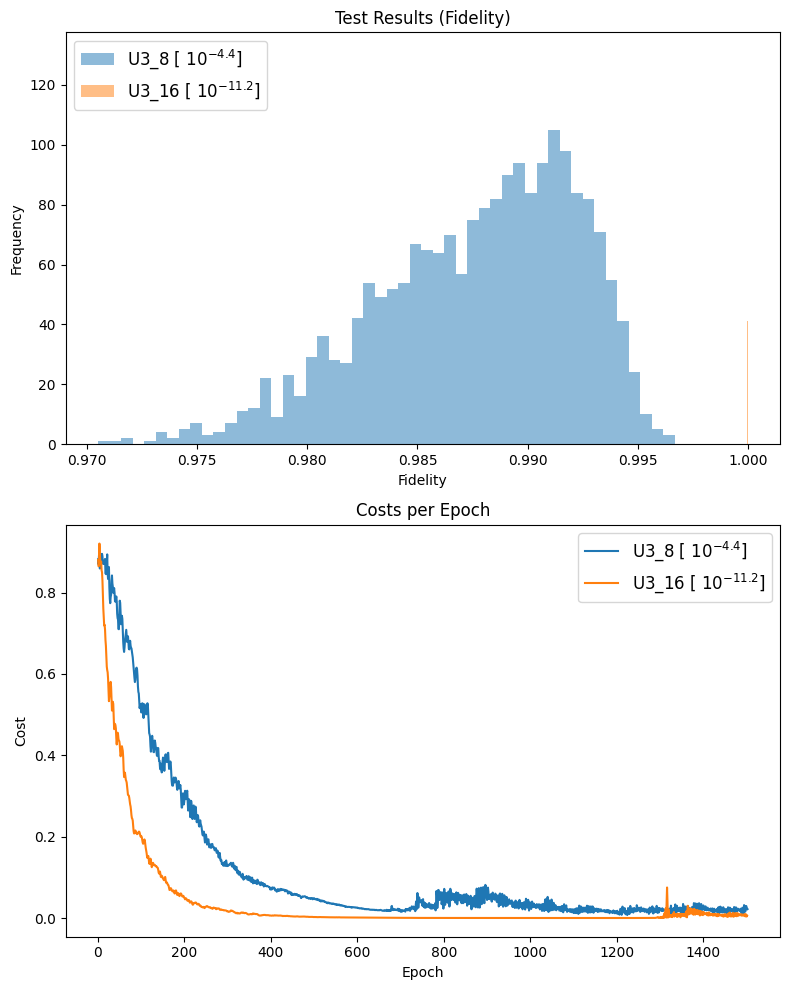

In [62]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import base64
import jax.numpy as jnp
gate_idx = 0
trot = 35
N_r = 1
N_ctrl = 3
selected_sets = [7,8,13,16,10,17,0,1]  # List of dataset indices
selected_sets = [8,16] 
num_train = 20
run_idx = 0
num_epochs = 1500
def calculate_iqr(data):
    """
    Calculate the Interquartile Range (IQR) of the input data.
    """
    iqr = np.percentile(data, 85) - np.percentile(data, 15)
    return iqr
data_files = [f'/Users/so714f/Documents/offline/qrc/analog_results_trainable_global/trainsize_{num_train}_epoch{num_epochs}_case1/0/U{N_ctrl}_{gate_idx}/reservoirs_{N_r}/trotter_step_{trot}/bath_False/data_run_{run_idx}.pickle'
              for gate_idx in selected_sets]
# Initialize the paths to the datasets (as a loop)
# data_files = [f'/Users/so714f/Documents/offline/qrc/analog_results_trainable_global/trainsize_{num_train}_epoch{num_epochs}_case1/0/U{N_ctrl}_{gate_idx}/reservoirs_{N_r}/trotter_step_{trot}/bath_False/data_run_{run_idx}.pickle'
#               for run_idx in selected_sets]
def calculate_gradient_stats(gradients):
    mean_grad = jnp.mean(gradients, axis=0)
    mean_grad_squared = jnp.mean(gradients**2, axis=0)
    var_grad = mean_grad_squared - mean_grad**2
    return mean_grad, var_grad
# Load the datasets and extract relevant data
data_results = []
for i,file_path in enumerate(data_files):
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    
    # Extract necessary information from the dataset
    costs = [float(i) for i in data['costs'][0]]
    grads_per_epoch = [np.array(i) for i in data['grads_per_epoch'][0]]
    init_grads = grads_per_epoch[0]
    

    # print(init_grads.shape, np.abs((init_grads)),init_grads)
    testing_results = data['testing_results'][0]
    fidelity = data['avg_fidelity'][0]
    # avg_fidelity = np.mean(fidelity)
    opt_lr = data['opt_lr'][0]
    trainin_states = data['training_states'][0][0]
    

    # if selected_sets[i] ==17:
    #     gate = data['Gate'][0]
    #     decoded_qobj = pickle.loads(base64.b64decode(gate.encode('utf-8')))
    #     print(decoded_qobj)
    init_grads = grads_per_epoch[0]
    var_grad = [np.var(grads) for grads in grads_per_epoch]
    min_grad = [np.min(np.abs(grads)) for grads in grads_per_epoch]
    max_grad = [np.max(np.abs(grads)) for grads in grads_per_epoch]

    iqr_var_grad = calculate_iqr(jnp.array(init_grads))
    mean_fidelity = round(float(np.mean(testing_results)), 8)
    std_fidelity = round(float(np.std(testing_results)), 5)
    error = np.log(1. - mean_fidelity)
    # Print the results
    print(f"\nAverage Fidelity (U{N_ctrl}_{selected_sets[i]}): {mean_fidelity} ± {std_fidelity}")
    print(f"    lr: {opt_lr:.4f}, init Var: {np.var(init_grads):.2e}, IQR: {iqr_var_grad:.2e}, Min Gradient: {np.min(np.abs(init_grads)):.2e}, Max Grad: {np.max(np.abs(init_grads)):.2e}")
    print(f"first cost: {costs[0]:.3e}, last: {costs[-1]:.3e}. {costs[299]}")
    # print(f"From test: {np.mean(data['var_grad'][0]):.5e}, IQR: {calculate_iqr(data['var_grad'][0]):.5e}, Min Gradient: {data['min_grad'][0]:.5e}, Max Grad: {data['max_grad'][0]:.5e}")

    
    mean_grad, var_grad_out = calculate_gradient_stats(init_grads)
    

    

    data_results.append({
        'costs': costs,
        'var_grad': var_grad,
        'min_grad': min_grad,
        'max_grad': max_grad,
        'avg_fidelity':fidelity,
        'testing_results': testing_results,
        'error': round(error,1),
        'init_grads':init_grads,
    })

# Now plot the results
fig, ax = plt.subplots(2, 1, figsize=(8, 10))

# Loop over datasets and add each to the plots
for idx, dataset in enumerate(data_results):
    # Dynamically label the dataset for each selected set
    avg_fidelity = dataset['avg_fidelity']
    err = dataset['error']
    
    label = f'U{N_ctrl}_{selected_sets[idx]} [ $10^{{{dataset['error']}}}$]'
    
    # Plot testing results (histograms)
    ax[0].hist([float(i) for i in dataset['testing_results']], bins=50, alpha=0.5, label=f'{label}')
    
    # Plot costs per epoch
    ax[1].plot(range(1, len(dataset['costs']) + 1), dataset['costs'], label=label)
    
    # Plot variance of gradients per epoch
    # ax[2].plot(range(1, len(dataset['var_grad']) + 1), dataset['var_grad'], label=label)
    # ax[2].set_yscale('log')
    # # Plot minimum absolute value of gradients per epoch
    # ax[3].plot(range(1, len(dataset['min_grad']) + 1), dataset['min_grad'],linewidth=1, label=label)
    # ax[3].set_yscale('log')
    # # Plot maximum absolute value of gradients per epoch
    # ax[4].plot(range(1, len(dataset['max_grad']) + 1), dataset['max_grad'], label=label)
    # ax[4].set_yscale('log')

# Customize the plot titles, labels, and legends
ax[0].set_title('Test Results (Fidelity)')
ax[0].set_xlabel('Fidelity')
ax[0].set_ylabel('Frequency')
ax[0].legend(fontsize=12)

ax[1].set_title('Costs per Epoch')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Cost')
ax[1].legend(fontsize=12)

# ax[2].set_title('Variance of Gradients per Epoch')
# ax[2].set_xlabel('Epoch')
# ax[2].set_ylabel('Variance')
# ax[2].legend(fontsize=12)

# ax[3].set_title('Minimum Absolute Value of Gradients per Epoch')
# ax[3].set_xlabel('Epoch')
# ax[3].set_ylabel('Min Abs Gradient')
# ax[3].set_yscale('log')  # Log scale as before
# ax[3].legend(fontsize=12)

# ax[4].set_title('Maximum Absolute Value of Gradients per Epoch')
# ax[4].set_xlabel('Epoch')
# ax[4].set_ylabel('Max Abs Gradient')
# ax[4].legend(fontsize=12)

plt.tight_layout()
plt.show()

In [57]:
def get_initial_learning_rate(grads, scale_factor=0.01, min_lr=1e-3, max_lr=0.2):
    """Estimate a more practical initial learning rate based on the gradient norms."""
    grad_norm = jnp.linalg.norm(grads)
    print(f"grad_norm: {grad_norm}")
    
    initial_lr = jnp.where(grad_norm > 0, scale_factor / grad_norm, 0.1)
    print(f"initial_lr: {initial_lr}")
    initial_lr = jnp.clip(initial_lr, min_lr, max_lr)
    
    return initial_lr, grad_norm
def get_lr_ngd(grads,  base_step=np.pi/16, min_lr=1e-3, max_lr=0.2):
    """
    use normalized gradient approach
    lr = base_step /||grads||
    """
    grad_norm = jnp.linalg.norm(grads)
    lr = jnp.where(grad_norm > 0, base_step / grad_norm, 0.1)
    print(f"lr: {lr}")
    lr = jnp.clip(lr, min_lr, max_lr)
    return lr, grad_norm
def get_initial_lr_per_param(grads, base_step=1.0, min_lr=1e-4, max_lr=0.2):
    """
    Provide a *vector* of learning rates, one for each parameter,
    inversely proportional to the param's gradient magnitude.
    """
    grad_magnitudes = jnp.abs(grads) + 1e-12
    lr_vector = base_step / grad_magnitudes
    # print(f"lr_vector: {lr_vector}")
    lr_vector = jnp.clip(lr_vector, min_lr, max_lr)
    return lr_vector

costs_u3_17 = data_results[1]['costs']
print(costs_u3_17[249])
initial_gradients_u3_17 = data_results[1]['init_grads']
# print(np.pi/4)
print(get_initial_learning_rate(initial_gradients_u3_17)[0])
print(get_initial_lr_per_param(initial_gradients_u3_17)[0])

0.12714014947414398
grad_norm: 0.8858534693717957
initial_lr: 0.011288548819720745
0.011288549
0.2


In [ ]:
from jax import jit
@jit
def approximate_largest_hessian_eig(params, cost_func, shift=1e-3):
    """
    Approximate the largest diagonal entry of the Hessian
    by parameter-shift second derivatives, 
    then use it as a crude bound on the largest eigenvalue.
    """
    diag_vals = []
    for i in range(len(params)):
        # Shift param i
        params_plus = params.at[i].add( shift )
        params_minus = params.at[i].add(-shift)
        
        cost_plus = cost_func(params_plus)
        cost_minus = cost_func(params_minus)
        cost_center = cost_func(params)
        
        # approx 2nd derivative wrt param i
        second_deriv = (cost_plus - 2*cost_center + cost_minus) / (shift**2)
        diag_vals.append(second_deriv)
        
    max_diag = jnp.max(jnp.abs(jnp.array(diag_vals)))
    # This is a rough approximation of the largest eigenvalue
    return max_diag

def get_initial_lr_hessian(params, cost_func, grads, min_lr=1e-3, max_lr=0.2):
    """
    Use Hessian-based approach for the initial learning rate:
      lr ~ 1 / lambda_max
    where lambda_max is an estimate of the largest Hessian eigenvalue 
    (bounded from above by max diagonal entry).
    """
    hess_bound = approximate_largest_hessian_eig(params, cost_func)
    grad_norm = jnp.linalg.norm(grads)
    # If hess_bound is zero or extremely small, fallback
    lr_approx = jnp.where(hess_bound > 1e-12, 1.0 / hess_bound, 0.1)
    lr_approx = jnp.clip(lr_approx, min_lr, max_lr)
    return lr_approx, grad_norm

0.8866005389744814

In [ ]:
# Define the parameters
gate_idx = 
trot = 3
N_r = 1
N_ctrl = 2
selected_sets = [0,1,2,3,9]  # List of selected data run indices
trainsize = 20 
def calculate_iqr(data):
    """
    Calculate the Interquartile Range (IQR) of the input data.
    """
    iqr = np.percentile(data, 75) - np.percentile(data, 25)
    return iqr
# Initialize the plot for costs per epoch
plt.figure(figsize=(10, 8))
# Loop through the selected sets
# for idx, run_idx in enumerate(selected_sets):
for idx, run_idx in enumerate(selected_sets):
    # Load the dataset
    file_path =f'/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_{trainsize}_optimized_by_cost/0/U{N_ctrl}_{run_idx}/reservoirs_{N_r}/trotter_step_{trot}/bath_False/data_run_1.pickle'
    # file_path = f'/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_test/0/U{N_ctrl}_{gate_idx}/reservoirs_{N_r}/trotter_step_{trot}/bath_False/data_run_{run_idx}.pickle'
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    
    # Extract data
    costs = [float(i) for i in data['costs'][0]]
    grads_per_epoch = [np.array(i) for i in data['grads_per_epoch'][0]]
    testing_results = data['testing_results'][0]
    fidelity = 1 - data['avg_fidelity'][0]
    opt_lr = data['opt_lr'][0]
    
    # Convert jax arrays to Python floats without rounding
    mean_fidelity = round(float(np.mean(testing_results)), 5)
    std_fidelity = round(float(np.std(testing_results)), 5)

    # Print the results
    print(f"U {run_idx + 1}:")
    print(f"Average Fidelity: {mean_fidelity} ± {std_fidelity}")

    
    plt.hist(testing_results, bins=50, alpha=0.5,label = f'U{N_ctrl}_{run_idx}')




plt.legend(loc='upper right', fontsize=8)
plt.tight_layout()
plt.show()

In [33]:
gate_idx = 1

1478
1504
1498
1449
1292


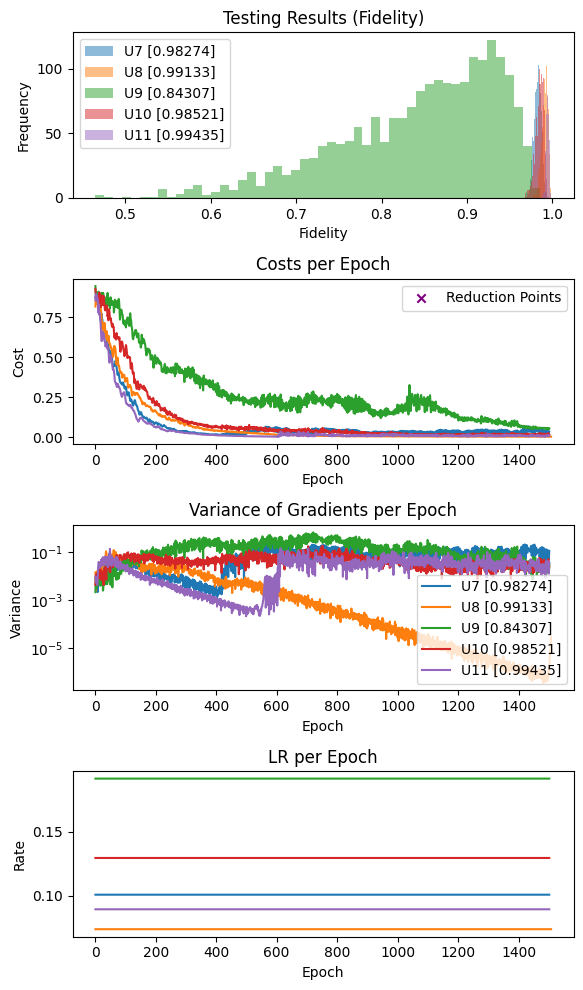

In [27]:
import os
import jax.numpy as jnp
import numpy as np
import pickle
import matplotlib.pyplot as plt

# Configuration
gate_idx = 7
trots = 30
N_r = 1
N_ctrl = 3

# File paths
data_files = [
    f'/Users/so714f/Documents/offline/qrc/analog_results_trainable_global/trainsize_20_epoch1500_case1/0/U{N_ctrl}_{gate_idx}/reservoirs_1/trotter_step_{trots}/bath_False/data_run_0.pickle',
    f'/Users/so714f/Documents/offline/qrc/analog_results_trainable_global/trainsize_20_epoch1500_case1/0/U{N_ctrl}_{gate_idx+1}/reservoirs_1/trotter_step_{trots}/bath_False/data_run_0.pickle',
    f'/Users/so714f/Documents/offline/qrc/analog_results_trainable_global/trainsize_20_epoch1500_case1/0/U{N_ctrl}_{gate_idx+2}/reservoirs_1/trotter_step_{trots}/bath_False/data_run_0.pickle',
    f'/Users/so714f/Documents/offline/qrc/analog_results_trainable_global/trainsize_20_epoch1500_case1/0/U{N_ctrl}_{gate_idx+3}/reservoirs_1/trotter_step_{trots}/bath_False/data_run_0.pickle',
    f'/Users/so714f/Documents/offline/qrc/analog_results_trainable_global/trainsize_20_epoch1500_case1/0/U{N_ctrl}_{gate_idx+4}/reservoirs_1/trotter_step_{trots}/bath_False/data_run_0.pickle',

    # f'/Users/so714f/Documents/offline/qrc/analog_results_trainable_global/trainsize_20_epoch1500_case1/0/U{N_ctrl}_{gate_idx}/reservoirs_1/trotter_step_{trots}/bath_False/data_run_0.pickle',
    # f'/Users/so714f/Documents/offline/qrc/analog_results_trainable_global/trainsize_20_epoch1500_case1/0/U{N_ctrl}_{gate_idx+1}/reservoirs_1/trotter_step_{trots}/bath_False/data_run_0.pickle',
    # f'/Users/so714f/Documents/offline/qrc/analog_results_trainable_global/trainsize_20_epoch1500_case1/0/U{N_ctrl}_{gate_idx+2}/reservoirs_1/trotter_step_{trots}/bath_False/data_run_0.pickle',
    
    # f'/Users/so714f/Documents/offline/qrc/analog_results_trainable_global/trainsize_20_epoch1200_case3_PATIENCE20/0/U{N_ctrl}_{gate_idx}/reservoirs_1/trotter_step_{trots}/bath_False/data_run_0.pickle',
    # f'/Users/so714f/Documents/offline/qrc/analog_results_trainable_global/trainsize_20_epoch1500_case3_PATIENCE50/0/U{N_ctrl}_{gate_idx}/reservoirs_1/trotter_step_{trots}/bath_False/data_run_0.pickle'

    #  f'/Users/sophieblock/Downloads/debug/digital_results_trainable_global/trainsize_20_epoch1500_case3/U{N_ctrl}_{gate_idx}/reservoirs_{N_r}/trotter_step_{trot}/bath_False/data_run_0.pickle',
    #  f'/Users/sophieblock/Downloads/debug/digital_results_trainable_global/trainsize_20_epoch1500_case1/U{N_ctrl}_{gate_idx}/reservoirs_{N_r}/trotter_step_{trot}/bath_False/data_run_0.pickle',
    # f'/Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost3/U{N_ctrl}_{gate_idx}/reservoirs_{N_r}/trotter_step_{trot}/bath_False/data_run_0.pickle'
]
labels = [f'U{gate_idx+i}'  for i in range(len(data_files))]
        
# Ensure all files exist
for file_path in data_files:
    if not os.path.exists(file_path):
        print(f"[ERROR] File does not exist: {file_path}")

# Calculate IQR
def calculate_iqr(data):
    """Calculate the Interquartile Range (IQR) of the input data."""
    iqr = np.percentile(data, 85) - np.percentile(data, 15)
    return iqr

# Calculate gradient statistics
def calculate_gradient_stats(gradients):
    mean_grad = jnp.mean(gradients, axis=0)
    mean_grad_squared = jnp.mean(gradients**2, axis=0)
    var_grad = mean_grad_squared - mean_grad**2
    return mean_grad, var_grad

# Calculate global gradient norm
def calculate_global_gradient_norm(grads_per_epoch):
    return [np.linalg.norm(grad) for grad in grads_per_epoch]

# Load datasets
data_results = []
for file_path in data_files:
    # print(f"[DEBUG] Processing file: {file_path}")
    try:
        with open(file_path, 'rb') as f:
            data = pickle.load(f)
    except Exception as e:
        print(f"[ERROR] Could not load file {file_path}: {e}")
        continue

    # Extract necessary information
    try:
        costs = [float(i) for i in data['costs'][0]]
        grads_per_epoch = [np.array(i) for i in data['grads_per_epoch'][0]]
        init_grads = grads_per_epoch[0]
        # try:
        #     testing_results = data['testing_results'][0]
        # except KeyError:
        #     testing_results = data['X'][0]
        testing_results = data['testing_results'][0]

        fidelity = data['avg_fidelity'][0]
        # opt_lr = data['opt_lr'][0]
        lrs = data['lrs'][0]
        scales_per_epoch = data['scales_per_epoch'][0]
        scale_reduction_epochs = data['scale_reduction_epochs'][0]
    except KeyError as e:
        lrs = []
        scales_per_epoch = []
        scale_reduction_epochs = []
        testing_results = data['fidelities'][0]
        fidelity = data['avg_fidelity'][0]
        print(data['training_size'][0])
    print(data['backup_epoch'][0])
    # Calculate gradient statistics
    iqr_var_grad = calculate_iqr(jnp.array(init_grads))
    grad_norm = calculate_global_gradient_norm(grads_per_epoch)

    # Store results
    data_results.append({
        'costs': costs,
        'var_grad': [np.var(grads) for grads in grads_per_epoch],
        'min_grad': [np.min(np.abs(grads)) for grads in grads_per_epoch],
        'max_grad': [np.max(np.abs(grads)) for grads in grads_per_epoch],
        'grad_norm': grad_norm,
        'avg_fidelity': fidelity,
        'testing_results': testing_results,
        'lrs': lrs,
        'scales_per_epoch': scales_per_epoch,
        'scale_reduction_epochs': scale_reduction_epochs
    })

# Plotting
fig, ax = plt.subplots(4, 1, figsize=(6, 10))

# Loop over datasets and plot
for idx, dataset in enumerate(data_results):
    label = f'{labels[idx]} [{dataset["avg_fidelity"]:.5f}]'

    # Plot testing results (Fidelity histogram)
    ax[0].hist([float(i) for i in dataset['testing_results']], bins=50, alpha=0.5, label=label)
    
    # Plot costs per epoch
    
    if idx ==0:
        ax[1].scatter(dataset["scale_reduction_epochs"], 
                    [dataset["costs"][e] for e in dataset["scale_reduction_epochs"]],
                    color="purple", marker='x',label=f"Reduction Points", zorder=5)
    else:
        ax[1].scatter(dataset["scale_reduction_epochs"], 
                    [dataset["costs"][e] for e in dataset["scale_reduction_epochs"]],
                    color="purple", marker='x', zorder=5)
    ax[1].plot(range(1, len(dataset['costs']) + 1), dataset['costs'])
    
    
    # Plot variance of gradients per epoch
    ax[2].plot(range(1, len(dataset['var_grad']) + 1), dataset['var_grad'], label=label)
    ax[2].set_yscale('log')
    ax[3].plot(range(1, len(dataset['lrs']) + 1), dataset['lrs'], label=label)
# Customize plots
ax[0].set_title('Testing Results (Fidelity)')
ax[0].set_xlabel('Fidelity')
ax[0].set_ylabel('Frequency')
ax[0].legend(fontsize=10)

ax[1].set_title('Costs per Epoch')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Cost')
ax[1].legend(fontsize=10)

ax[2].set_title('Variance of Gradients per Epoch')
ax[2].set_xlabel('Epoch')
ax[2].set_ylabel('Variance')
ax[2].legend(fontsize=10)

ax[3].set_title('LR per Epoch')
ax[3].set_xlabel('Epoch')
ax[3].set_ylabel('Rate')
plt.tight_layout()
plt.show()

1444
1108
1431
1461


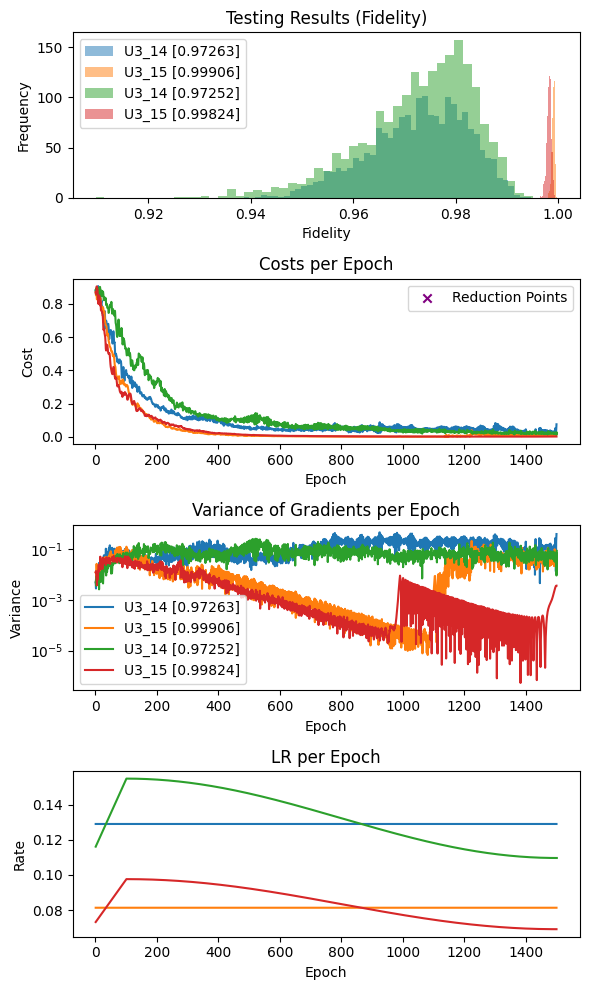

In [26]:
import os
import jax.numpy as jnp
import numpy as np
import pickle
import matplotlib.pyplot as plt

# Configuration
gate_idx = 14
trots = 30
N_r = 1
N_ctrl = 3

# File paths
data_files = [
    f'/Users/so714f/Documents/offline/qrc/analog_results_trainable_global/trainsize_20_epoch1500_case1/0/U{N_ctrl}_{gate_idx}/reservoirs_1/trotter_step_{trots}/bath_False/data_run_0.pickle',
    f'/Users/so714f/Documents/offline/qrc/analog_results_trainable_global/trainsize_20_epoch1500_case1/0/U{N_ctrl}_{gate_idx+1}/reservoirs_1/trotter_step_{trots}/bath_False/data_run_0.pickle',
    # f'/Users/so714f/Documents/offline/qrc/analog_results_trainable_global/trainsize_20_epoch1500_case1/0/U{N_ctrl}_{gate_idx+2}/reservoirs_1/trotter_step_{trots}/bath_False/data_run_0.pickle',
    # f'/Users/so714f/Documents/offline/qrc/analog_results_trainable_global/trainsize_20_epoch1500_case1/0/U{N_ctrl}_{gate_idx+3}/reservoirs_1/trotter_step_{trots}/bath_False/data_run_0.pickle',
    # f'/Users/so714f/Documents/offline/qrc/analog_results_trainable_global/trainsize_20_epoch1500_case1/0/U{N_ctrl}_{gate_idx+4}/reservoirs_1/trotter_step_{trots}/bath_False/data_run_0.pickle',

    f'/Users/so714f/Documents/offline/qrc/analog_results_trainable_global/trainsize_20_epoch1500_case4/0/U{N_ctrl}_{gate_idx}/reservoirs_1/trotter_step_{trots}/bath_False/data_run_0.pickle',
    f'/Users/so714f/Documents/offline/qrc/analog_results_trainable_global/trainsize_20_epoch1500_case4/0/U{N_ctrl}_{gate_idx+1}/reservoirs_1/trotter_step_{trots}/bath_False/data_run_0.pickle',
    # f'/Users/so714f/Documents/offline/qrc/analog_results_trainable_global/trainsize_20_epoch1500_case4/0/U{N_ctrl}_{gate_idx+2}/reservoirs_1/trotter_step_{trots}/bath_False/data_run_0.pickle',

    # f'/Users/so714f/Documents/offline/qrc/analog_results_trainable_global/trainsize_20_epoch1200_case3_PATIENCE20/0/U{N_ctrl}_{gate_idx}/reservoirs_1/trotter_step_{trots}/bath_False/data_run_0.pickle',
    # f'/Users/so714f/Documents/offline/qrc/analog_results_trainable_global/trainsize_20_epoch1500_case3_PATIENCE50/0/U{N_ctrl}_{gate_idx}/reservoirs_1/trotter_step_{trots}/bath_False/data_run_0.pickle'

    #  f'/Users/sophieblock/Downloads/debug/digital_results_trainable_global/trainsize_20_epoch1500_case3/U{N_ctrl}_{gate_idx}/reservoirs_{N_r}/trotter_step_{trot}/bath_False/data_run_0.pickle',
    #  f'/Users/sophieblock/Downloads/debug/digital_results_trainable_global/trainsize_20_epoch1500_case1/U{N_ctrl}_{gate_idx}/reservoirs_{N_r}/trotter_step_{trot}/bath_False/data_run_0.pickle',
    # f'/Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost3/U{N_ctrl}_{gate_idx}/reservoirs_{N_r}/trotter_step_{trot}/bath_False/data_run_0.pickle'
]
labels = [f'U{gate_idx+i}'  for i in range(len(data_files))]
        
# Ensure all files exist
for file_path in data_files:
    if not os.path.exists(file_path):
        print(f"[ERROR] File does not exist: {file_path}")

# Calculate IQR
def calculate_iqr(data):
    """Calculate the Interquartile Range (IQR) of the input data."""
    iqr = np.percentile(data, 85) - np.percentile(data, 15)
    return iqr

# Calculate gradient statistics
def calculate_gradient_stats(gradients):
    mean_grad = jnp.mean(gradients, axis=0)
    mean_grad_squared = jnp.mean(gradients**2, axis=0)
    var_grad = mean_grad_squared - mean_grad**2
    return mean_grad, var_grad

# Calculate global gradient norm
def calculate_global_gradient_norm(grads_per_epoch):
    return [np.linalg.norm(grad) for grad in grads_per_epoch]

# Load datasets
data_results = []
for file_path in data_files:
    # print(f"[DEBUG] Processing file: {file_path}")
    try:
        with open(file_path, 'rb') as f:
            data = pickle.load(f)
    except Exception as e:
        print(f"[ERROR] Could not load file {file_path}: {e}")
        continue

    # Extract necessary information
    try:
        costs = [float(i) for i in data['costs'][0]]
        grads_per_epoch = [np.array(i) for i in data['grads_per_epoch'][0]]
        init_grads = grads_per_epoch[0]
        # try:
        #     testing_results = data['testing_results'][0]
        # except KeyError:
        #     testing_results = data['X'][0]
        testing_results = data['testing_results'][0]

        fidelity = data['avg_fidelity'][0]
        # opt_lr = data['opt_lr'][0]
        lrs = data['lrs'][0]
        scales_per_epoch = data['scales_per_epoch'][0]
        scale_reduction_epochs = data['scale_reduction_epochs'][0]
    except KeyError as e:
        lrs = []
        scales_per_epoch = []
        scale_reduction_epochs = []
        testing_results = data['fidelities'][0]
        fidelity = data['avg_fidelity'][0]
        print(data['training_size'][0])
    print(data['backup_epoch'][0])
    # Calculate gradient statistics
    iqr_var_grad = calculate_iqr(jnp.array(init_grads))
    grad_norm = calculate_global_gradient_norm(grads_per_epoch)

    # Store results
    data_results.append({
        'costs': costs,
        'var_grad': [np.var(grads) for grads in grads_per_epoch],
        'min_grad': [np.min(np.abs(grads)) for grads in grads_per_epoch],
        'max_grad': [np.max(np.abs(grads)) for grads in grads_per_epoch],
        'grad_norm': grad_norm,
        'avg_fidelity': fidelity,
        'testing_results': testing_results,
        'lrs': lrs,
        'label':file_path.split('/')[-5],
        'scales_per_epoch': scales_per_epoch,
        'scale_reduction_epochs': scale_reduction_epochs
    })

# Plotting
fig, ax = plt.subplots(4, 1, figsize=(6, 10))

# Loop over datasets and plot
for idx, dataset in enumerate(data_results):
    label = f'{dataset['label']} [{dataset["avg_fidelity"]:.5f}]'
    # label = f'{labels[idx]} [{dataset["avg_fidelity"]:.5f}]'

    # Plot testing results (Fidelity histogram)
    ax[0].hist([float(i) for i in dataset['testing_results']], bins=50, alpha=0.5, label=label)
    
    # Plot costs per epoch
    
    if idx ==0:
        ax[1].scatter(dataset["scale_reduction_epochs"], 
                    [dataset["costs"][e] for e in dataset["scale_reduction_epochs"]],
                    color="purple", marker='x',label=f"Reduction Points", zorder=5)
    else:
        ax[1].scatter(dataset["scale_reduction_epochs"], 
                    [dataset["costs"][e] for e in dataset["scale_reduction_epochs"]],
                    color="purple", marker='x', zorder=5)
    ax[1].plot(range(1, len(dataset['costs']) + 1), dataset['costs'])
    
    
    # Plot variance of gradients per epoch
    ax[2].plot(range(1, len(dataset['var_grad']) + 1), dataset['var_grad'], label=label)
    ax[2].set_yscale('log')
    ax[3].plot(range(1, len(dataset['lrs']) + 1), dataset['lrs'], label=label)
# Customize plots
ax[0].set_title('Testing Results (Fidelity)')
ax[0].set_xlabel('Fidelity')
ax[0].set_ylabel('Frequency')
ax[0].legend(fontsize=10)

ax[1].set_title('Costs per Epoch')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Cost')
ax[1].legend(fontsize=10)

ax[2].set_title('Variance of Gradients per Epoch')
ax[2].set_xlabel('Epoch')
ax[2].set_ylabel('Variance')
ax[2].legend(fontsize=10)

ax[3].set_title('LR per Epoch')
ax[3].set_xlabel('Epoch')
ax[3].set_ylabel('Rate')
plt.tight_layout()
plt.show()

In [13]:
import optax
opt_descr = 'case 4'
   
opt_lr=0.1
schedule = optax.warmup_cosine_decay_schedule(
    init_value=opt_lr*0.8,
    peak_value=opt_lr*1.1,
    warmup_steps=100,
    decay_steps=1000,
    end_value=opt_lr*0.75,
)

opt = optax.chain(
        optax.clip_by_global_norm(1.0),
        optax.inject_hyperparams(optax.adam)(learning_rate=schedule),
    )

params = np.array([1,2,3,4])
opt_state = opt.init(params)
print(opt_state)

(EmptyState(), InjectStatefulHyperparamsState(count=Array(0, dtype=int32), hyperparams={'b1': Array(0, dtype=int32), 'b2': Array(0, dtype=int32), 'eps': Array(0, dtype=int32), 'eps_root': Array(0, dtype=int32), 'learning_rate': Array(0, dtype=int32)}, hyperparams_states={'learning_rate': WrappedScheduleState(count=Array(0, dtype=int32))}, inner_state=(ScaleByAdamState(count=Array(0, dtype=int32), mu=Array([0, 0, 0, 0], dtype=int32), nu=Array([0, 0, 0, 0], dtype=int32)), EmptyState())))


/Users/so714f/opt/anaconda3/envs/jit_env/lib/python3.12/site-packages/optax/schedules/_inject.py:34: UserWarning: Explicitly requested dtype int64 requested in asarray is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  return jnp.asarray(x, dtype=dtype)


In [7]:
gate_indices = range(20)
# trotter_steps = {1, 5, 10, 15, 20, 25, 30, 35, 40}
trotter_steps = {15,20,25}
# File labels
labels = ['reduce_on_plateau (Case 3)', 'Fixed LR (Case 1)']
# labels = [ 'Fixed LR (Case 0)','optimized_by_cost', 'no_hypertraining']
# Base paths for the three file sources
base_paths = [
     f'/Users/so714f/Documents/offline/qrc/analog_results_trainable_global/trainsize_20_epoch1500_case1/0/',
    f'/Users/so714f/Documents/offline/qrc/analog_results_trainable_global/trainsize_20_epoch1200_case3_PATIENCE20/0/'

    # '/Users/sophieblock/Downloads/debug/digital_results_trainable_global/trainsize_20_epoch1200_case3/',
    # # '/Users/sophieblock/Downloads/debug/digital_results_trainable_global/trainsize_20_epoch1500_case1/',
    # '/Users/sophieblock/Downloads/debug/digital_results_trainable_global/trainsize_20_epoch1200_case0/',
    # '/Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost3/',
    # '/Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_no_hypertraining/'
]
def re_pickle_file(file_path):
    try:
        with open(file_path, 'rb') as f:
            data = pickle.load(f)
        # Re-pickle the file to remove deprecated attributes
        with open(file_path, 'wb') as f:
            pickle.dump(data, f, protocol=pickle.HIGHEST_PROTOCOL)
        # print(f"[INFO] Re-pickled file: {file_path}")
    except Exception as e:
        print(f"[ERROR] Could not re-pickle file {file_path}: {e}")

# Initialize combined results
combined_results = {i: {trot: [] for trot in trotter_steps} for i in range(len(base_paths))}

# Iterate through gates and trotter steps
for gate_idx in gate_indices:
    for trot in trotter_steps:
        for file_idx, base_path in enumerate(base_paths):
            # Construct the file path
            if file_idx == 0:
                file_path = (
                f"{base_path}U{N_ctrl}_{gate_idx}/reservoirs_{N_r}/trotter_step_{trot}/bath_False/data_run_0.pickle"
            )
            else:
                file_path = (
                    f"{base_path}U{N_ctrl}_{gate_idx}/reservoirs_{N_r}/trotter_step_{trot}/bath_False/data_run_0.pickle"
                )

            # Try to load the file
            try:
                with open(file_path, 'rb') as f:
                    data = pickle.load(f)
                re_pickle_file(file_path)
            except Exception as e:
                # print(f"[ERROR] Could not load file {file_path}: {e}")
                continue

            # Extract testing results (fidelities)
            try:
                testing_results = data['testing_results'][0]
            except KeyError:
                testing_results = data['fidelities'][0]
            
            # Aggregate fidelities for the current trotter step
            combined_results[file_idx][trot].extend([float(res) for res in testing_results])

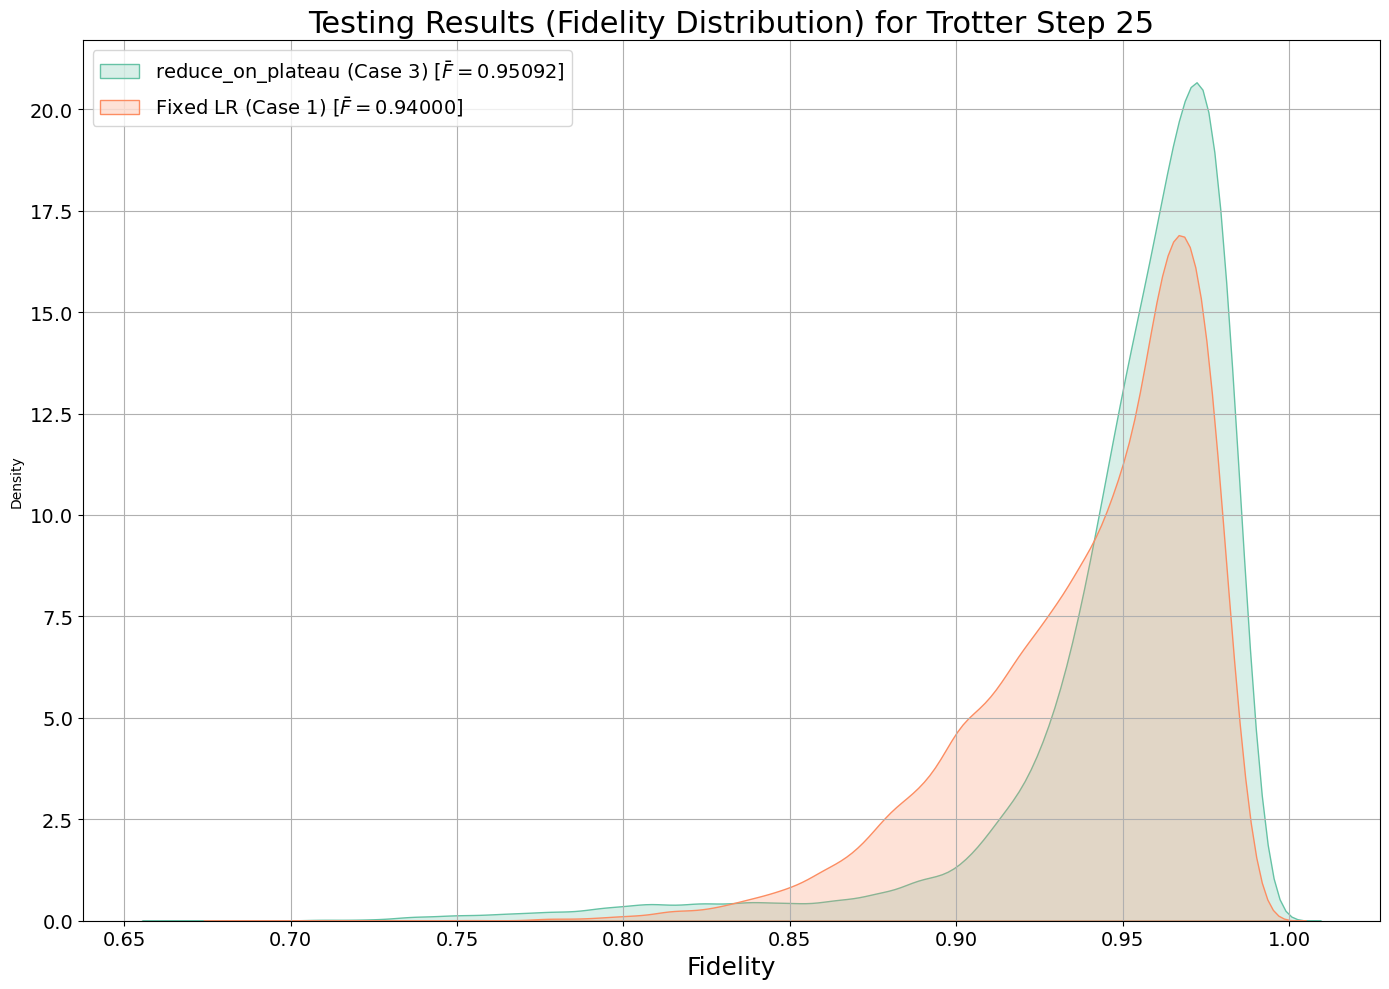

In [10]:
import seaborn as sns
def plot_combined_kde(combined_results, trotter_step):
    """
    Plot KDE of testing results (fidelities) for a specific trotter step.
    
    Args:
        combined_results: dict containing testing results organized by file index and trotter step.
        trotter_step: int, the trotter step to plot.
    """
    if trotter_step not in trotter_steps:
        print(f"[ERROR] Invalid trotter step: {trotter_step}. Valid steps: {sorted(trotter_steps)}")
        return
    
    fig, ax = plt.subplots(figsize=(14, 10))
    ax.grid(True, zorder=10)
    
    cmap = plt.get_cmap('Set2')
    
    # Plot KDE for each file index at the specified trotter step
    for file_idx, results_by_trot in combined_results.items():
        fidelities = results_by_trot[trotter_step]
        if 1.0 - np.mean(fidelities) < 1e-4:
            sns.kdeplot(
                fidelities, ax=ax, fill=True, multiple="layer",
                color=cmap(file_idx), label=f"{labels[file_idx]}  [$Err = {1-np.mean(fidelities):.2e}$]"
            )
            # sns.kdeplot(
            #     fidelities, ax=ax, fill=True, multiple="layer",
            #     color=cmap(file_idx), label=f"{labels[file_idx]}  [$Err = {np.log10(1-np.mean(fidelities))}$]"
            # )
        else:
            sns.kdeplot(
                fidelities, ax=ax, fill=True, multiple="layer",
                color=cmap(file_idx), label=f"{labels[file_idx]} [$\\bar{{F}} = {np.mean(fidelities):.5f}$]"
            )
    
    # Customize plot
    ax.set_xlabel('Fidelity', fontsize=18)
    ax.set_title(f'Testing Results (Fidelity Distribution) for Trotter Step {trotter_step}', fontsize=22)
    ax.legend(loc='upper left', fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=14)

    plt.tight_layout()
    plt.show()

# Example Usage
plot_combined_kde(combined_results, trotter_step=25)

In [ ]:
# Define the parameters
gate_idx = 1
trot = 1
N_r = 1
N_ctrl = 1
selected_sets = [3,9]  # List of selected data run indices
trainsize = 20
def calculate_iqr(data):
    """
    Calculate the Interquartile Range (IQR) of the input data.
    """
    iqr = np.percentile(data, 75) - np.percentile(data, 25)
    return iqr
# Initialize the plot for costs per epoch
plt.figure(figsize=(10, 8))
# Loop through the selected sets
for idx, run_idx in enumerate(selected_sets):
    # Load the dataset
    file_path =f'/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_{trainsize}_optimized_by_cost3/0/U{N_ctrl}_{gate_idx}/reservoirs_{N_r}/trotter_step_{trot}/bath_False/data_run_0.pickle'
    file_path = f'/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_test/0/U{N_ctrl}_{gate_idx}/reservoirs_{N_r}/trotter_step_{trot}/bath_False/data_run_{run_idx}.pickle'
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    
    # Extract data
    costs = [float(i) for i in data['costs'][0]]
    grads_per_epoch = [np.array(i) for i in data['grads_per_epoch'][0]]
    testing_results = data['testing_results'][0]
    fidelity = 1 - data['avg_fidelity'][0]
    opt_lr = data['opt_lr'][0]
    
    # Convert jax arrays to Python floats without rounding
    mean_fidelity = round(float(np.mean(testing_results)), 5)
    std_fidelity = round(float(np.std(testing_results)), 5)
    var_grad = float(jnp.mean(data['var_grad'][0]))
    iqr_var_grad = calculate_iqr(jnp.array(data['var_grad'][0]))
    min_grad = float(jnp.min(data['min_grad'][0]))
    max_grad = float(jnp.max(data['max_grad'][0]))

    # Print the results
    print(f"Set {run_idx + 1} (data_run_{run_idx}):")
    print(f"Average Fidelity: {mean_fidelity} ± {std_fidelity}")
    print(f"Initial Variance: {var_grad:.5e}, IQR: {iqr_var_grad:.5e}, Min Gradient: {min_grad:.5e}, Max Gradient: {max_grad:.5e}\n")
    # Plot the cost per epoch for this dataset
    plt.plot(range(1, len(costs) + 1), costs, label=f'Set {run_idx + 1} (data_run_{run_idx})')
    

# Finalize the plot
plt.title('Costs per Epoch for Selected Sets')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.legend(loc='upper right', fontsize=8)
plt.tight_layout()
plt.show()

In [10]:
gate_idx =4
trot = 8
N_r = 1
N_ctrl = 2
trainsize = 20
temp = 1*10**-2.9
# /Users/sophieblock/QRCCapstone/param_initialization/analog_results/Nc_1/reservoirs_1/trotter_step_2/10_training_states_no_opt/fixed_params0/1.0K/test22
a = f'/Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_epoch1000/U2_1/reservoirs_2/trotter_step_30/bath_False/data_run_0.pickle'
b =f'/Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_epoch1000/U2_1/reservoirs_2/trotter_step_30/bath_False/data_run_1.pickle'

# a =f'/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_{trainsize}_optimized_by_cost_t1.0/0/U{N_ctrl}_{gate_idx}/reservoirs_1/trotter_step_{trot}/bath_False/data_run_0.pickle'
with open(a, 'rb') as f:  # Note 'rb' here, which means read binary
    df = pickle.load(f)
with open(b, 'rb') as f:  # Note 'rb' here, which means read binary
    dfb = pickle.load(f)
# results_dict = df['preopt_results']
print(df['epochs'])
print(dfb['epochs'])
fig, ax = plt.subplots(figsize=(16, 9))
# gate_idx =gate_idx + 1
costs = [float(i) for i in df['costs'][0]]
costsb = [float(i) for i in dfb['costs'][0]]
# rocs = [float(i) for i in df['rocs'][0]]
# print(df['selected_indices'][0])
grads_per_epoch = [np.array(i) for i in df['grads_per_epoch'][0]]
testing_results = df['testing_results'][0]
fidelity = df['avg_fidelity'][0]
# print(df['stored_epoch'][0],df['a_marked'][0]*1e-3, (df['a_marked'][0]*temp)*1 )
print(df['epochs'][0])
# print(df['training_states'][0][0])
# print(df['init_params'][0])
label1 =f"analog: {fidelity:6e}"
# print(df['init_params'][0][trot:])
# results_dict = df['preopt_results']

gate = df['Gate'][0]
decoded_qobj = pickle.loads(base64.b64decode(gate.encode('utf-8')))
#print(decoded_qobj)
test_results = [float(i) for i in df['testing_results'][0]]  # Add this line to read the test results if needed
ax.hist(test_results, bins=50, alpha=0.5,label = label1)

test_resultsb = [float(i) for i in dfb['testing_results'][0]] 
ax.hist(test_resultsb, bins=50, alpha=0.5,label = 'b')
print(f"final_cost: {1-costs[-1]:.4f}. avg fidelity 1: {np.mean(test_results):3f} +- {np.std(test_results):3f}\n")
print(test_results)
fig, ax = plt.subplots(figsize=(16, 9))

ax.plot(costsb)
ax.plot(costs)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_epoch1000/U2_1/reservoirs_2/trotter_step_30/bath_False/data_run_1.pickle'

In [ ]:
gate_idx =0
trot = 28
N_ctrl = 2
trainsize = 20
temp = 1*10**-2.9
res_count = 1
# /Users/sophieblock/QRCCapstone/param_initialization/analog_results/Nc_1/reservoirs_1/trotter_step_2/10_training_states_no_opt/fixed_params0/1.0K/test22
# a = f'/Users/sophieblock/QRCCapstone/param_initialization/analog_results/Nc_{N_ctrl}/reservoirs_{N_r}/trotter_step_{trot}/10_training_states_no_opt/fixed_params0/1.0K/test22/U{N_ctrl}_{gate_idx}/data_run_0.pickle'
a = f'/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U{N_ctrl}_{gate_idx}/reservoirs_1/trotter_step_{trot}/bath_False/data_run_0.pickle'
# a =f'/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_{trainsize}_optimized_by_cost_t1.0/0/U{N_ctrl}_{gate_idx}/reservoirs_1/trotter_step_{trot}/bath_False/data_run_0.pickle'
with open(a, 'rb') as f:  # Note 'rb' here, which means read binary
    df = pickle.load(f)
# # results_dict = df['preopt_results']
fig, ax = plt.subplots(figsize=(16, 9))
# # gate_idx =gate_idx + 1
costs = [float(i) for i in df['costs'][0]]
# rocs = [float(i) for i in df['rocs'][0]]
# # print(df['stored_epoch'][0],df['selected_indices'][0])
# grads_per_epoch = [np.array(i) for i in df['grads_per_epoch'][0]]
test_results = df['testing_results'][0]
fidelity = df['avg_fidelity'][0]
# # print(df['stored_epoch'][0],df['backup_epoch'][0], (df['a_marked'][0]*temp)*1 )
# # print(df['backup_epoch'][0])
# # print(df['training_states'][0][0])
# # print(df['init_params'][0])
label1 =f"analog: {fidelity:6e}"
params = df['init_params'][0]
params = '[' + ', '.join([f"{x:.16f}" for x in params]) + ']'

print(params)
print(f"final_cost: {1-costs[-1]:.4f}. avg fidelity 1: {fidelity:3f} +- {np.std(test_results):3f}")
# print(df['stored_epoch'][0],df['selected_indices'][0])
print(f"lr: {df['opt_lr'][0]:.5f}, train state 0: ",df['training_states'][0][0])
# gate = df['Gate'][0]
# decoded_qobj = pickle.loads(base64.b64decode(gate.encode('utf-8')))
# #print(decoded_qobj)
print(df.keys())
test_results = [float(i) for i in df['testing_results'][0]]  # Add this line to read the test results if needed
ax.hist(test_results, bins=50, alpha=0.5,label = label1)

# add=0
# if N_ctrl ==3:
#     add = 5
# /Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_20_optimized_by_cost3/0/U2_0/reservoirs_1/trotter_step_10/bath_False/data_run_0.pickle
# b =f'/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_{trainsize}_optimized_by_cost/0/U{N_ctrl}_{gate_idx}/reservoirs_{N_r}/trotter_step_{trot}/bath_False/data_run_0.pickle'
b =f'/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_{trainsize}/0/U{N_ctrl}_{gate_idx}/reservoirs_{res_count}/trotter_step_{trot}/bath_False/data_run_0.pickle'

# b =f'/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_{trainsize}_optimized_by_cost_test/0/U{N_ctrl}_{gate_idx}/reservoirs_1/trotter_step_{trot}/bath_False/A5_to_A7__.pickle'

with open(b, 'rb') as f:  # Note 'rb' here, which means read binary
    df = pickle.load(f)
# rocs2 = [float(i) for i in df['rocs'][0]]
# print(df['init_params'][0][trot:])
results_dict = df['preopt_results']
# a_marked = df['a_marked'][0]
costs2 = [float(i) for i in df['costs'][0]]
testing_results2 = df['testing_results'][0]
fidelity2 = df['avg_fidelity'][0]
# print(df['stored_epoch'][0],df['selected_indices'][0])
label2 = f"test 53: {fidelity2:6e}"
gate = df['Gate'][0]
decoded_qobj = pickle.loads(base64.b64decode(gate.encode('utf-8')))
# results_dict = df['preopt_results']
test_results2 = [float(i) for i in df['testing_results'][0]]  # Add this line to read the test results if needed
ax.hist(test_results2, bins=50, alpha=0.5,label = label2)
print(f"\nfinal_cost: {1-costs2[-1]:.4f}. avg fidelity 3: {fidelity2:3f} +- {np.std(test_results2):3f}")
print(df['stored_epoch'][0],df['selected_indices'][0])
print(f"lr: {df['opt_lr'][0]:.5f}")
print(df['init_params'][0])

# c =f'/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_20/0/U{N_ctrl}_{gate_idx}/reservoirs_1/trotter_step_{trot}/bath_False/data_run_1.pickle'
# # c =f'/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_{trainsize+add}/0/U{N_ctrl}_{gate_idx}/reservoirs_1/trotter_step_{trot}/bath_False/data_run_2.pickle'

# with open(c, 'rb') as f:  # Note 'rb' here, which means read binary
#     df = pickle.load(f)

# costs3 = [float(i) for i in df['costs'][0]]

# fidelity3 = df['avg_fidelity'][0]
# results_dict = df['preopt_results']
# label3 =  f"analog (trots: {trot}): {fidelity3:6e}"

# test_results3 =  [float(i) for i in df['testing_results'][0]]  # Add this line to read the test results if needed
# # results_dict = df['preopt_results']
# print(f"\nfinal_cost: {1-costs3[-1]:.4f}. avg fidelity 3: {np.mean(test_results3):3f} +- {np.std(test_results3):3f}")
# print(df['stored_epoch'][0],df['selected_indices'][0])
# # print(f"lr: {df['opt_lr'][0]:.5f}, replacement indices: ",df['replacement_indices'][0])
# # print(df['init_params'][0])
# ax.hist(test_results3, bins=50, alpha=0.5,label = label3)




# # /Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_20_all_results/0/U1_9/reservoirs_1/trotter_step_3/bath_False/data_run_3.pickle
# d =f'/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_{trainsize}/0/U{N_ctrl}_{gate_idx}/reservoirs_{res_count}/trotter_step_{trot}/bath_False/data_run_1.pickle'
# with open(d, 'rb') as f:  # Note 'rb' here, which means read binary
#     df = pickle.load(f)



# costs4 = [float(i) for i in df['costs'][0]]

# fidelity4 = df['avg_fidelity'][0]

# label4 =  f"digital (trots: {trot}): {fidelity4:6e}"

# test_results4 = [float(i) for i in df['testing_results'][0]]  # Add this line to read the test results if needed

# print(f"\nfinal_cost: {1-costs4[-1]:.4f}. avg fidelity 4: {np.mean(test_results4):3f} +- {np.std(test_results4):3f}")

# print(f"lr: {df['opt_lr'][0]:.5f}, train state 0: ",df['training_states'][0][0])
# print(df['stored_epoch'][0],df['selected_indices'][0])
# # print(df['selected_indices'][0])
# ax.hist(test_results4, bins=50, alpha=0.5,label = label4)



# ax.legend(fontsize=20)

# /analog_results_trainable_global/trainsize_20/0/U3_2/reservoirs_1/trotter_step_24/bath_False/data_run_1.pickle

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

# Load the first dataset
a = '/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U2_0/reservoirs_1/trotter_step_8/bath_False/data_run_0.pickle'
with open(a, 'rb') as f:
    df = pickle.load(f)

test_results1 = [float(i) for i in df['testing_results'][0]]
label1 = f"analog: {df['avg_fidelity'][0]:6e}"

# Load the second dataset
b = '/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_20/0/U2_0/reservoirs_1/trotter_step_8/bath_False/data_run_0.pickle'
with open(b, 'rb') as f:
    df = pickle.load(f)

test_results2 = [float(i) for i in df['testing_results'][0]]
label2 = f"test 53: {df['avg_fidelity'][0]:6e}"

# Load the third dataset
c = '/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_20/0/U2_0/reservoirs_1/trotter_step_8/bath_False/data_run_1.pickle'
with open(c, 'rb') as f:
    df = pickle.load(f)

test_results3 = [float(i) for i in df['testing_results'][0]]
label3 = f"analog (trots: 8): {df['avg_fidelity'][0]:6e}"

# Plot using seaborn histplot
plt.figure(figsize=(12, 8))

sns.histplot(test_results1, bins=50, label=label1, color="blue", stat='probability',alpha=0.5)
sns.histplot(test_results2, bins=50, label=label2, color="green",stat='probability', alpha=0.5)
sns.histplot(test_results3, bins=50, label=label3, color="orange",stat='probability', alpha=0.5)

plt.legend()
plt.title('Fidelity Distributions from Testing Results')
plt.xlabel('Fidelity')
plt.ylabel('Count')
plt.show()


In [ ]:
costs[-1]

In [ ]:
plt.plot(range(1,len(costs)+1),costs, label = label1)
linestyle =  '--'


plt.plot(range(1,len(costs2)+1),costs2, label = label2)

plt.plot(range(1,len(costs3)+1),costs3, label = label3, linestyle=linestyle)
# plt.plot(range(1,len(costs4)+1),costs4, label = label4, linestyle=linestyle)
plt.legend()

# print(costs[1490:])
# len(costs)

In [ ]:
plt.plot(rocs)

In [ ]:

b =1*(10**-2.55)

print(b*3.42e-04)
b = 1 * (10**-3)

# b = 1**10-2.5
print(b*3.42e-04)

In [ ]:
i = 1400
plt.plot(costs[i:])
plt.plot(costs2[i:])
costs[-4]-costs[-1]

In [ ]:
thresh =9.638869624924435e-07
thresh = 7.866838e-07
for i,a in enumerate(rocs):
    if a < 0.0 and np.abs(a) < thresh:
        print(i, a)

In [ ]:
print(rocs[11]*1e-3)
# print(np.abs(rocs[50])*1e-2)
# rocs[850]
# print(rocs2[:20])

In [ ]:
print(rocs[8]*1e-3)

In [ ]:
import jax.numpy as jnp
import numpy
def calculate_gradient_stats_per_state(gradients,abs_grad=True):
    
    """Calculate the mean and variance of the gradients for each state."""
    if abs_grad:
        gradients = jnp.abs(gradients)
    mean_grad = jnp.mean(gradients, axis=-1)  # Mean across parameters for each state
    mean_grad_squared = jnp.mean(gradients ** 2, axis=-1)  # Mean squared gradients across parameters
    var_grad = mean_grad_squared - mean_grad ** 2  # Variance per state
    grad_norm = jnp.linalg.norm(gradients, axis=-1)  # Norm per state

    return mean_grad, var_grad, grad_norm
def analyze_results(results_dict, num_datasets):
    """
    Analyze results dictionary to select the best datasets for initial training, replacement, and fine-tuning.
    """
    # Lists to store metrics for normalization purposes
    var_grad_means,var_var_grads = [], []
    min_gradvars,max_gradvars = [], []
    min_mean_grads,max_mean_grads = [], []
    grad_norms, mean_grads = [],[]
    min_norm_var_grads, max_norm_var_grads = [],[]
    normalized_var_grad_norms = []

    # Initialize tracking for scores and results
    results = {}

    # Loop through all datasets in the results_dict
    for set_idx in range(num_datasets):
        # Extract necessary statistics for the current dataset
        # meangrad_norm, vargrad_norm, gradnorm_norm = calculate_gradient_stats_per_state(normalized_gradients_per_state)
        result = results_dict[f'dataset_{set_idx}']
        var_grad_mean = result["Mean(Var Grad)"]
        variance_of_variance_gradients_normalized =result["Var(Var Grad) [normalized]"]
        mean_grad = result["Mean(Mean Grad)"]
        min_grad, max_grad = result['Min Gradient'], result['Max Gradient']
        min_vargrad, max_vargrad = result['min_var_grad_means'], result['max_var_grad_means']
        min_gradvars.append(min_vargrad)
        max_gradvars.append(max_vargrad)
        min_mean_grads.append(min_grad)
        max_mean_grads.append(max_grad)
        var_var_grad = result["Var(Var Grad)"]
        grad_norm = result["Gradient Norm"]
        norm_var_grad_mean = result["Mean(Var Grad) [normalized]"]

        # Collect statistics for normalization purposes
        var_grad_means.append(var_grad_mean)
        var_var_grads.append(var_var_grad)
        mean_grads.append(mean_grad)
        grad_norms.append(grad_norm)
        
        normalized_var_grad_norms.append(np.float64(variance_of_variance_gradients_normalized))

    # Compute min and max for normalization
    min_var_var,max_var_var = min(var_var_grads), max(var_var_grads)
    print(np.array(mean_grads).shape)
    print(f"Variance of the gradients: [min: {min(min_gradvars):.2e}), max: {max(max_gradvars):.2e}]")
    print(f"Mean gradients: [min: {min(min_mean_grads):.2e}), max: {max(max_mean_grads):.2e}]")
    min_var_grad = min(min_gradvars)
    max_var_grad = max(max_gradvars)
    min_mean = min(min_mean_grads)
    max_mean = max(max_mean_grads)
    min_norm_var_grad = min(normalized_var_grad_norms*10)
    max_norm_var_grad = max(normalized_var_grad_norms*10)
    print(f"normalized_var_grad_norms: {normalized_var_grad_norms}")
    log_var_grad_norms = [numpy.float64(np.log2(el)) for el in normalized_var_grad_norms]
    print(f"log_var_grad_norms: {log_var_grad_norms}")
    print(f"min: {min_norm_var_grad:.2e}, max: {max_norm_var_grad:.2e}")
    # Function for normalizing metrics
    def normalize_metric(value, min_val, max_val, epsilon=1e-6, upper_bound=0.999):
        if max_val > min_val:
            # Adjust to avoid exactly 0.0 and 1.0, and ensure upper bound doesn't reach 1.0
            normalized_value = (value - min_val ) / (max_val - min_val + 2 )
            return min(normalized_value, upper_bound)
        else:
            return 0.5  # Neutral value if min and max are the same
        
    to_print = [0,1,2,3,4,5,6,7,8,9]
    alpha = 1.0
    # Weights for each metric in the weighted sum approach

    w1 = 0.8  # Weight for normalized variance of the gradient
    w2 = .2# Weight for normalized gradient norm
    w3 = 0.5 # Weight for normalized variance of the variance of the gradient

    beta =0.5

    max_scale = max(max_mean,max_var_grad)
    min_scale = min(min_mean,min_var_grad)
    print(f"Scaled: [min: {min_scale:.2e}), max: {max_scale:.2e}]")
    # Now calculate scores and store them in the results
    for set_idx in range(num_datasets):
        i = set_idx
        result = results_dict[f'dataset_{set_idx}']

        # Extract necessary statistics for the current dataset
        var_grad_mean = result["Mean(Var Grad)"]
        var_var_grad = result["Var(Var Grad)"]
        mean_grad = np.mean(result["Mean(Mean Grad)"])
        var_mean_grad = result["Var(Mean Grad)"]
        grad_norm = result["Gradient Norm"]
        X,y = result["dataset"]
        
        mean_variance_of_gradient_normalized =result["Mean(Var Grad) [normalized]"]
        variance_of_variance_gradients_normalized =normalized_var_grad_norms[set_idx]
        average_of_mean_gradients_normalized_abs =result["Mean(Mean Grad) [normalized]"]
        variance_of_mean_gradients_normalized =result["Var(Mean Grad) [normalized]"]
        normalized_grad_norm = result["Norm(Gradient Norm)"]
        
        
        # Normalize var_grad_mean and grad_norm
        normalized_mean_variance_of_gradient = normalize_metric(var_grad_mean, min_scale,max_scale)
        normalized_mean_gradient_score = normalize_metric(mean_grad,  min_scale,max_scale)
        # normalized_mean_variance_of_gradient_normalized = normalize_metric(mean_variance_of_gradient_normalized, min_var_grad, max_var_grad)
        normalized_var_var_grads = normalize_metric(var_var_grad,   min_var_var,max_var_var)
        normalized_var_mean_gradient = normalize_metric(var_mean_grad, min_scale,max_scale)
        variance_of_variance_gradients_normalized_scaled = normalize_metric(variance_of_variance_gradients_normalized, min_norm_var_grad,max_norm_var_grad)
        # normalized_grad_norm_score = normalize_metric(grad_norm, 0, 1)
        # normalized_mean_variance_of_gradient_normalized = normalize_metric(mean_of_variance_normalized_gradient, 0, 1)
        # normalized_var_var_grads = normalize_metric(var_var_grad, 0, 1)
        
        # initial_score = (
        #     w1 * (var_grad_mean)  # Reward high gradient variance
        #     +w2 * (mean_grad)   # Reward high gradient norm
        #     # +w2*(average_of_mean_gradients_normalized_abs)
        #     -w3* (var_var_grad)  # Penalize high variance of variance of gradients
        #      -beta * (var_mean_grad)  # Penalize high variance of mean gradients
        # )
        other_score = (
            w1 * (normalized_mean_variance_of_gradient)  # Reward high gradient variance
            +w2 * (normalized_mean_gradient_score)   # Reward high gradient norm
            # +w2*(average_of_mean_gradients_normalized_abs)
            -w3* (variance_of_variance_gradients_normalized)  # Penalize high variance of variance of gradients
             -beta * (normalized_var_mean_gradient)  # Penalize high variance of mean gradients
        )
        initial_score = (
            w1 * (normalized_mean_variance_of_gradient)  # Reward high gradient variance
            +w2 * (normalized_mean_gradient_score)   # Reward high gradient norm
            # +w2*(average_of_mean_gradients_normalized_abs)
            -w3* (variance_of_variance_gradients_normalized_scaled)  # Penalize high variance of variance of gradients
             -beta * (normalized_var_mean_gradient)  # Penalize high variance of mean gradients
        )
      
        # Compute Replacement Score (focus on stable gradient variance but consider Var(Var Grad))
        replacement_score = (
            mean_variance_of_gradient_normalized * np.exp(-beta * (normalized_grad_norm - 1) ** 2) 
        )
        # replacement_score = (normalized_grad_norm + mean_variance_of_gradient_normalized

        # )

        fine_tuning_score = 0.5 * normalized_grad_norm + 0.5 * mean_variance_of_gradient_normalized

        # Store the scores in the results dictionary
        results[f'dataset_{set_idx}'] = {
            "Initial Score": initial_score,
            "Replacement Score": replacement_score,
            
        }
        if set_idx in to_print:
            # Print the detailed summary statistics for each dataset
            print(f"(A{i}, b{i}) ")
            # print(f"    first state  : {X[0]}")
            # print(f"    Var(Grad): {var_grad_mean:.2e}, Mean(Grad): {mean_grad:.2e} ->  Var(Grad)+Mean(Grad) = {var_grad_mean+mean_grad:.2e}")
            print(f"    Raw Var(Grad): {var_grad_mean:.2e}")
            print(f"    Var(Grad): {w1*normalized_mean_variance_of_gradient:.2e}, Mean(Grad): {w2*normalized_mean_gradient_score:.2e} ->  Var(Grad)+Mean(Grad) = {w1*normalized_mean_variance_of_gradient+w2*normalized_mean_gradient_score:.2e} [scaled]")
            # print(f"    Var(Var): {variance_of_variance_gradients_normalized_scaled:.2e}, {variance_of_variance_gradients_normalized:.2e},  {normalized_var_var_grads:.2e}.  VarMean): {var_mean_grad:.2e}, {normalized_var_mean_gradient:.2e}")
            print(f"    Var(Var) scaled: {variance_of_variance_gradients_normalized_scaled:.2e}, Var(Mean(Grad)): {normalized_var_mean_gradient:.2e} -> {-w3*variance_of_variance_gradients_normalized_scaled+ -beta*normalized_var_mean_gradient:.2e}")
            print(f"    Initial Score: {initial_score:.3e}, other: {other_score:.3e}\n")

            # print(f"(A{i}, b{i}) ")
            # print(f"    Var(Grad): {var_grad_mean:.2e}, Normalized Var(Grad): {mean_variance_of_gradient_normalized:.2e}")
            # print(f"    scaled vargrad: {normalized_mean_variance_of_gradient:.2e}, scaled meangrad: {normalized_mean_gradient_score:.2e}")
            # print(f"    Mean(Grad): {mean_grad:.2e},  Mean(GradNorm): {average_of_mean_gradients_normalized_abs:.2e}")
            # print(f"    Var(MeanGrad): {var_mean_grad:.2e},  VarMean(GradNorm): {variance_of_mean_gradients_normalized:.2e}")
            # # print(f"    Gradient Norm: {grad_norm:.2e}, Normalized Grad Norm: {normalized_grad_norm_score:.2e}")
            # # print(f"    first state  : {X[0]}")
            # # print(f"    Var(NormGrad): {mean_variance_of_gradient_normalized:.2e}, Normalized Var(NormGrad): {normalized_grad_norm:.2e}")
            # print(f"    Var(Var(Grad)): {var_var_grad:.2e}, Normalized  Var(Var(Grad)): {variance_of_variance_gradients_normalized:.2e}")
            
            # print(f"    Initial Score: {initial_score:.3e}, Replacement Score: {replacement_score:.3e}, other: {other_score:.3e}\n")


    # Now select the best datasets for initial training, replacement, and fine-tuning
    sorted_by_initial = sorted(results.items(), key=lambda x: x[1]["Initial Score"], reverse=True)
    sorted_by_replacement = sorted(results.items(), key=lambda x: x[1]["Replacement Score"], reverse=True)

    # print(sorted_by_replacement)
    # Best for initial training
    best_for_initial_training = sorted_by_initial[0]
    
    # Ensure the replacement is not the same as the initial
    if sorted_by_replacement[0][0] == best_for_initial_training[0]:
        best_for_replacement = sorted_by_replacement[1]  # Pick the second best
    else:
        best_for_replacement = sorted_by_replacement[0]



    # Print the results
    print(f"Best Dataset for Initial Training: {best_for_initial_training[0]} with score: {best_for_initial_training[1]['Initial Score']:.2e}")
    print(f"Best Dataset for Replacement: {best_for_replacement[0]} with score: {best_for_replacement[1]['Replacement Score']:.2e}")

    # Return the best datasets
    return best_for_initial_training, best_for_replacement
analyze_results(results_dict[0],num_datasets)

# [-0.658#[ 0.21641777-0.05214687j  0.1271135 +0.6088834j  -0.41251817+0.46148774j  -0.0407903 -0.422778j  ]

In [ ]:
analyze_results(results_dict[0],num_datasets)

In [ ]:
results_dict[0]

avg fidelity 1: 0.99174512347579 +- 0.0027397721582176553
avg fidelity 3: 0.9912960633635521 +- 0.002645143835515139
avg fidelity 3: 0.9983646594158782 +- 0.00047729121268886556

In [ ]:
num_epochs = 1000
a = 3*num_epochs // 4

a

Variance of gradients = 1.337231e-01; Varince of mean gradient 1.186686e-02 IQR of Variance (25,75) = 8.437296e-02; min grad: 3.721845e-04; max grad: 5.292232e-01

Variance of gradients = 1.493278e-01; Varince of mean gradient 8.839552e-03 IQR of Variance (25,75) = 8.805603e-02; min grad: 2.534003e-04; max grad: 3.528179e-01

{}
init_params:  [-0.88111204 -1.487593   -1.8190458  -0.01114495  0.76837647]
final_cost: 6.172260e-01. avg fidelity 1: 6.810059e-01 +- 2.114353e-01


FileNotFoundError: [Errno 2] No such file or directory: '/Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost/U2_0/reservoirs_1/trotter_step_1/bath_False/testing_preopt/trainingset_A7_rep_A9.pickle'

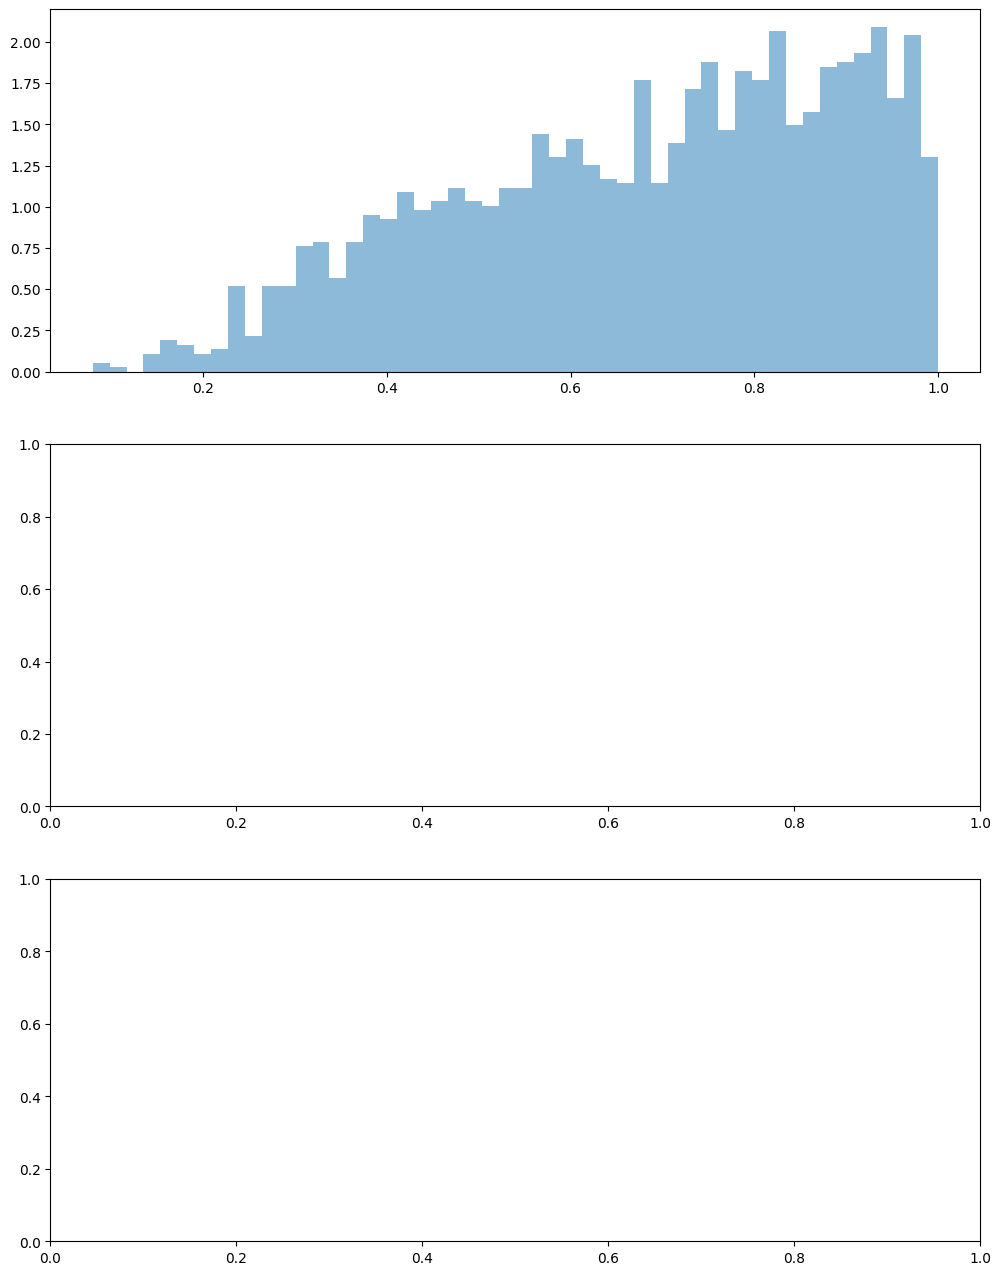

In [11]:
gate_idx =0
trot = 1
N_r = 1
N_ctrl = 2
#/Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost/U2_3/reservoirs_1/trotter_step_9/bath_False/testing_preopt/trainingset_A4_rep_A7.pickle

a = f'/Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost3/U{N_ctrl}_{gate_idx}/reservoirs_1/trotter_step_{trot}/bath_False/data_run_0.pickle'
with open(a, 'rb') as f:  # Note 'rb' here, which means read binary
    df = pickle.load(f)

fig, axs = plt.subplots(3,1,figsize=(12, 16))
ax = axs[0]
# gate_idx =gate_idx + 1
preopt_results = df['selected_indices'][0]
print(preopt_results)
costs = [i for i in df['costs'][0]]
grads_per_epoch = [np.array(i) for i in df['grads_per_epoch'][0]]
max_grads_per_epoch = [max(arr) for arr in grads_per_epoch]
testing_results = df['test_results'][0]
fidelity = df['avg_fidelity'][0]
# print(df['training_states'][0][0])
print("init_params: ",df['init_params'][0])
label1 =f"A4_rep_A7"

gate = df['Gate'][0]
decoded_qobj = pickle.loads(base64.b64decode(gate.encode('utf-8')))
#print(decoded_qobj)
test_results = [i for i in df['test_results'][0]]  # Add this line to read the test results if needed
ax.hist(test_results, bins=50, alpha=0.5, density=True, label=label1)  # Normalize histogram

print(f"final_cost: {costs[-1]:4e}. avg fidelity 1: {np.mean(test_results):3e} +- {np.std(test_results):3e}")

b =f'/Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost/U{N_ctrl}_{gate_idx}/reservoirs_1/trotter_step_{trot}/bath_False/testing_preopt/trainingset_A7_rep_A9.pickle'

with open(b, 'rb') as f:  # Note 'rb' here, which means read binary
    df = pickle.load(f)


grads_per_epoch2 = [np.array(i) for i in df['grads_per_epoch'][0]]
max_grads_per_epoch2 = [max(arr) for arr in grads_per_epoch2]
costs2 =  [i for i in df['costs'][0]]

fidelity2 = df['avg_fidelity'][0]

label2 =  f"A7_rep_A9"

try:
    test_results2 = [i for i in df['testing_results'][0]]  # Add this line to read the test results if needed
except KeyError:
    test_results2 = [i for i in df['fidelities'][0]] 

print(f"final_cost: {costs2[-1]:4e}. avg fidelity 2: {np.mean(test_results2):3e} +- {np.std(test_results2):3e}")
ax.hist(test_results2, bins=50, alpha=0.5, density=True, label = label2)


c =f'/Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost/U{N_ctrl}_{gate_idx}/reservoirs_1/trotter_step_{trot}/bath_False/testing_preopt/trainingset_A4_rep_A9.pickle'

with open(c, 'rb') as f:  # Note 'rb' here, which means read binary
    df = pickle.load(f)


grads_per_epoch3 = [np.array(i) for i in df['grads_per_epoch'][0]]
max_grads_per_epoch3 = [max(arr) for arr in grads_per_epoch3]
costs3 =  [i for i in df['costs'][0]]

fidelity3 = df['avg_fidelity'][0]

label3 =  f"A4_rep_A9"

try:
    test_results3 = [i for i in df['testing_results'][0]]  # Add this line to read the test results if needed
except KeyError:
    test_results3 = [i for i in df['fidelities'][0]] 

print(f"final_cost: {costs3[-1]:4e}. avg fidelity 3: {np.mean(test_results3):3e} +- {np.std(test_results3):3e}")


ax.hist(test_results3, bins=50, alpha=0.5, density=True, label = label3)


# Define paths to the additional data files
d = f'/Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost/U{N_ctrl}_{gate_idx}/reservoirs_1/trotter_step_{trot}/bath_False/testing_preopt/trainingset_A9_rep_A7.pickle'
e = f'/Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost/U{N_ctrl}_{gate_idx}/reservoirs_1/trotter_step_{trot}/bath_False/testing_preopt/trainingset_A8_rep_A7.pickle'
# Load and plot the fourth dataset
with open(d, 'rb') as f:
    df = pickle.load(f)

label4 = f"A9_rep_A7"
costs4 = [i for i in df['costs'][0]]
grads_per_epoch4 = [np.array(i) for i in df['grads_per_epoch'][0]]
max_grads_per_epoch4 = [max(arr) for arr in grads_per_epoch4]
test_results4 = df['testing_results'][0]
ax.hist(test_results4, bins=50, alpha=0.5, density=True,  label=label4)

print(f"final_cost: {costs4[-1]:4e}. avg fidelity 4: {np.mean(test_results4):3e} +- {np.std(test_results4):3e}")

# Load and plot the fifth dataset
with open(e, 'rb') as f:
    df = pickle.load(f)

label5 = f"A8_rep_A7"
costs5 = [i for i in df['costs'][0]]
grads_per_epoch5 = [np.array(i) for i in df['grads_per_epoch'][0]]
max_grads_per_epoch5 = [max(arr) for arr in grads_per_epoch5]
test_results5 = df['testing_results'][0]
ax.hist(test_results5, bins=50, alpha=0.5, density=True,  label=label5)

print(f"final_cost: {costs5[-1]:4e}. avg fidelity 5: {np.mean(test_results5):3e} +- {np.std(test_results5):3e}")


# ax.set_ylim([0.0,1.0])

ax.legend()


# Plot costs for all datasets
axs[1].plot(range(1, len(costs) + 1), costs, label=label1)
axs[1].plot(range(1, len(costs2) + 1), costs2, label=label2)
axs[1].plot(range(1, len(costs3) + 1), costs3, label=label3)
axs[1].plot(range(1, len(costs4) + 1), costs4, label=label4)
axs[1].plot(range(1, len(costs5) + 1), costs5, label=label5)
axs[1].legend()

# Plot max gradient per epoch for all datasets
axs[2].plot(range(1, len(max_grads_per_epoch) + 1), max_grads_per_epoch, label=label1)
axs[2].plot(range(1, len(max_grads_per_epoch2) + 1), max_grads_per_epoch2, label=label2)
axs[2].plot(range(1, len(max_grads_per_epoch3) + 1), max_grads_per_epoch3, label=label3)
axs[2].plot(range(1, len(max_grads_per_epoch4) + 1), max_grads_per_epoch4, label=label4)
axs[2].plot(range(1, len(max_grads_per_epoch5) + 1), max_grads_per_epoch5, label=label5)
axs[2].legend()

# plt.show()/Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost3/U2_0/reservoirs_1/trotter_step_1/bath_False/data_run_0.pickle

In [ ]:
len(grads_per_epoch3[0])

In [ ]:
gate_idx =9
trot = 15
N_r = 1
N_ctrl = 2
#/Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost/U2_3/reservoirs_1/trotter_step_9/bath_False/testing_preopt/trainingset_A4_rep_A7.pickle
# a = f'/Users/sophieblock/QRCCapstone/param_initialization/analog_results/Nc_{N_ctrl}/reservoirs_{N_r}/trotter_step_{trot}/10_training_states_no_opt/fixed_params0/1.0K/test22/U{N_ctrl}_{gate_idx}/data_run_0.pickle'
a = f'/Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost/0/U{N_ctrl}_{gate_idx}/reservoirs_1/trotter_step_{trot}/bath_False/testing_preopt/data_run_0.pickle'
with open(a, 'rb') as f:  # Note 'rb' here, which means read binary
    df = pickle.load(f)

fig, ax = plt.subplots(figsize=(16, 9))
# gate_idx =gate_idx + 1
costs = [i for i in df['costs'][0]]
grads_per_epoch = [np.array(i) for i in df['grads_per_epoch'][0]]
testing_results = df['test_results'][0]
fidelity = df['avg_fidelity'][0]
# print(df['training_states'][0][0])
print("init_params: ",df['init_params'][0])
label1 =f"test 22: {fidelity:6e}"

gate = df['Gate'][0]
decoded_qobj = pickle.loads(base64.b64decode(gate.encode('utf-8')))
#print(decoded_qobj)
test_results = [i for i in df['testing_results'][0]]  # Add this line to read the test results if needed
ax.hist(test_results, bins=50, alpha=0.5,label = label1)
print(f"final_cost: {costs[-1]:4e}. avg fidelity 1: {np.mean(test_results):3e} +- {np.std(test_results):3e}")

trot = 10
c =f'/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_20_optimized_by_cost/0/U{N_ctrl}_{gate_idx}/reservoirs_1/trotter_step_{trot}/bath_False/data_run_0.pickle'

with open(c, 'rb') as f:  # Note 'rb' here, which means read binary
    df = pickle.load(f)



costs3 =  [i for i in df['costs'][0]]

fidelity3 = df['avg_fidelity'][0]

label3 =  f"digital (trots: {trot}): {fidelity3:6e}"

try:
    test_results3 = [i for i in df['testing_results'][0]]  # Add this line to read the test results if needed
except KeyError:
    test_results3 = [i for i in df['fidelities'][0]] 

print(f"final_cost: {costs3[-1]:4e}. avg fidelity 3: {np.mean(test_results3):3e} +- {np.std(test_results3):3e}")


ax.hist(test_results3, bins=50, alpha=0.5,label = label3)

ax.legend()


In [ ]:
plt.plot(range(1,len(costs)+1),costs, label = label1)

plt.plot(range(1,len(costs3)+1),costs3, label = label3)
#plt.plot(range(1,len(costs3)+1),costs3)
plt.legend()


In [ ]:
temp = [el for el in testing_results if el <0.0]
print(len(temp))

temp = [el for el in testing_results3 if el <0.0]
print(len(temp))

In [ ]:
temp = [el for el in test_results if el <0.0]
print(temp)

In [ ]:
test_results3
temp = [el for el in test_results3 if el <0.0]
print(temp)

In [ ]:
gate_idx = 1
trot = 2
N_r = 1
N_ctrl = 1
selected_sets = [0]  # List of dataset indices

def calculate_iqr(data):
    """
    Calculate the Interquartile Range (IQR) of the input data.
    """
    iqr = np.percentile(data, 85) - np.percentile(data, 15)
    return iqr
tests = ['test22','test53','test31','test50', 'test94','test121','test44','test125']
# Initialize the paths to the datasets (as a loop)
data_files = [f'/Users/sophieblock/QRCCapstone/param_initialization/analog_results/Nc_{N_ctrl}/reservoirs_{N_r}/trotter_step_{trot}/10_training_states_no_opt/fixed_params0/1.0K/{test_key}/U{N_ctrl}_{gate_idx}/data_run_0.pickle'
                for test_key in tests]

def calculate_gradient_stats(gradients):
    mean_grad = jnp.mean(gradients, axis=0)
    mean_grad_squared = jnp.mean(gradients**2, axis=0)
    var_grad = mean_grad_squared - mean_grad**2
    return mean_grad, var_grad

threshold = 10e-14
# Load the datasets and extract relevant data
data_results = {}
for i,file_path in enumerate(data_files):
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    
    # Extract necessary information from the dataset
    costs = [float(i) for i in data['costs'][0]]
    grads_per_epoch = [np.array(i) for i in data['grads_per_epoch'][0]]
    init_grads = grads_per_epoch[0]
    

    # print(init_grads.shape, np.abs((init_grads)),init_grads)
    testing_results = data['testing_results'][0]
    fidelity = data['avg_fidelity'][0]
    # avg_fidelity = np.mean(fidelity)
    opt_lr = data['opt_lr'][0]
    trainin_states = data['training_states'][0][0]
    

    var_nonzero_grads = []
    for grads in grads_per_epoch:
        

        nz_grads = [res for res in grads if np.abs(res) > threshold]
        # if tests[i] == 'test50':
        #     print(nz_grads)
        var_nonzero_grads.append(np.var(nz_grads))
    var_grad = [np.var(grads) for grads in grads_per_epoch]
    min_grad = [np.min(np.abs(grads)) for grads in grads_per_epoch]
    max_grad = [np.max(np.abs(grads)) for grads in grads_per_epoch]

    iqr_var_grad = calculate_iqr(jnp.array(init_grads))
    mean_fidelity = round(float(np.mean(testing_results)), 5)
    std_fidelity = round(float(np.std(testing_results)), 5)
    # Print the results
    print(f"\nAverage Fidelity ({tests[i]}): {mean_fidelity} ± {std_fidelity}")
    # print(f"Initial Variance ({tests[i]}): {np.var(init_grads):.5e}, IQR: {iqr_var_grad:.5e}, Min Gradient: {np.min(np.abs(init_grads)):.5e}, Max Grad: {np.max(np.abs(init_grads)):.5e}")

    # print(f"From test: {np.mean(data['var_grad'][0]):.5e}, IQR: {calculate_iqr(data['var_grad'][0]):.5e}, Min Gradient: {data['min_grad'][0]:.5e}, Max Grad: {data['max_grad'][0]:.5e}")

    
    mean_grad, var_grad_out = calculate_gradient_stats(init_grads)
    

    

    data_results[tests[i]] = {
        'costs': costs,
        'var_grad': var_grad,
        'var_nonzero_grads':var_nonzero_grads,
        'min_grad': min_grad,
        'max_grad': max_grad,
        'avg_fidelity':fidelity,
        'testing_results': testing_results
    }


In [ ]:

# Now plot the results
fig, ax = plt.subplots(5, 1, figsize=(8, 20))

# Loop over datasets and add each to the plots
for test_key, dataset in data_results.items():
    # Dynamically label the dataset for each selected set
    avg_fidelity = dataset['avg_fidelity']
    label = f'{test_key} [ {avg_fidelity:.5f}]'
    
    # Plot testing results (histograms)
    ax[0].hist([float(i) for i in dataset['testing_results']], bins=50, alpha=0.5, label=f'{label}')
    
    # Plot costs per epoch
    ax[1].plot(range(1, len(dataset['costs']) + 1), dataset['costs'], label=label)
    
    # Plot variance of gradients per epoch
    ax[2].plot(range(1, len(dataset['var_nonzero_grads']) + 1), dataset['var_nonzero_grads'], label=label)
    ax[2].set_yscale('log')
    # Plot minimum absolute value of gradients per epoch
    ax[3].plot(range(1, len(dataset['min_grad']) + 1), dataset['min_grad'],linewidth=1, label=label)
    ax[3].set_yscale('log')
    # Plot maximum absolute value of gradients per epoch
    ax[4].plot(range(1, len(dataset['max_grad']) + 1), dataset['max_grad'], label=label)
    ax[4].set_yscale('log')

# Customize the plot titles, labels, and legends
ax[0].set_title('Test Results (Fidelity)')
ax[0].set_xlabel('Fidelity')
ax[0].set_ylabel('Frequency')
ax[0].legend(fontsize=12)

ax[1].set_title('Costs per Epoch')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Cost')
ax[1].legend(fontsize=12)

ax[2].set_title('Variance of Gradients per Epoch')
ax[2].set_xlabel('Epoch')
ax[2].set_ylabel('Variance')
ax[2].legend(fontsize=12)

ax[3].set_title('Minimum Absolute Value of Gradients per Epoch')
ax[3].set_xlabel('Epoch')
ax[3].set_ylabel('Min Abs Gradient')
ax[3].set_yscale('log')  # Log scale as before
ax[3].legend(fontsize=12)

ax[4].set_title('Maximum Absolute Value of Gradients per Epoch')
ax[4].set_xlabel('Epoch')
ax[4].set_ylabel('Max Abs Gradient')
ax[4].legend(fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
gate_idx =1
trot = 7
N_r = 1
N_ctrl = 2
for gate_idx in range(0,20):
    print(f"U{N_ctrl}_{gate_idx}")
    a = f'/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U{N_ctrl}_{gate_idx}/reservoirs_{N_r}/trotter_step_{trot}/bath_False/data_run_0.pickle'
    with open(a, 'rb') as f:  # Note 'rb' here, which means read binary
        df = pickle.load(f)

    fig, ax = plt.subplots(figsize=(16, 9))

    costs = [float(i) for i in df['costs'][0]]
    grads_per_epoch = [np.array(i) for i in df['grads_per_epoch'][0]]
    testing_results = df['testing_results'][0]
    fidelity = 1 - df['avg_fidelity'][0]

    label1 =f"new lr: {df['opt_lr'][0]}"
    gate = df['Gate'][0]
    decoded_qobj = pickle.loads(base64.b64decode(gate.encode('utf-8')))
    #print(decoded_qobj)
    test_results = [float(i) for i in df['testing_results'][0]]  # Add this line to read the test results if needed
    ax.hist(test_results, bins=50, alpha=0.5,label = label1)
    print(f"avg fidelity 1: {np.mean(test_results)} +- {np.std(test_results)}")

    # b = f'/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost/0/U{N_ctrl}_{gate_idx}/reservoirs_{N_r}/trotter_step_{trot}/bath_False/data_run_0.pickle'
    # try:
    #     with open(b, 'rb') as f:  # Note 'rb' here, which means read binary
    #         df = pickle.load(f)



    #     costs2 = [float(i) for i in df['costs'][0]]
    #     testing_results2 = df['testing_results'][0]
    #     fidelity2 = 1 - df['avg_fidelity'][0]

    #     label2 = f"old lr: {df['opt_lr'][0]}"
    #     gate = df['Gate'][0]
    #     decoded_qobj = pickle.loads(base64.b64decode(gate.encode('utf-8')))

    #     test_results2 = [float(i) for i in df['testing_results'][0]]  # Add this line to read the test results if needed
    #     ax.hist(test_results2, bins=50, alpha=0.5,label = label2)
    #     print(f"avg fidelity 3: {np.mean(test_results2)} +- {np.std(test_results2)}")
    # except FileNotFoundError:
    #     pass
    
    ax.legend()

In [ ]:
a = [1,2,3]
print(a[:1])

In [ ]:
20 // 5